# 52954 - Machine Learning and Statistics - Project

## Mark Kelly - 2019

This assessment concerns the Boston House Prices dataset and is broken up into 3 main sections:
- Describe
- Infer
- Predict

__Describe__: Create a git repository and make it available online for the lecturer to clone. The repository should contain all your work for this assessment. Within the repository, create a jupyter notebook that uses descriptive statistics and plots to describe the Boston House Prices dataset. This part is worth 20% of your overall mark.

__Infer__: To the above jupyter notebook, add a section where you use inferential statistics to analyse whether there is a signiﬁcant diﬀerence in median house prices between houses that are along the Charles river and those that aren’t. You should explain and discuss your ﬁndings within the notebook.

__Predict__: Again using the same notebook, use keras to create a neural network that can predict the median house price based on the other variables in the dataset. You are free to interpret this as you wish — for example, you may use all the other variables, or select a subset. 

## Section 1 - Describe

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import statsmodels.stats.weightstats as ws

In [78]:
from sklearn.datasets import load_boston
df_boston = load_boston()
import matplotlib.pyplot as plt

In [79]:
import keras as kr

In [80]:
# For encoding categorical variables.
import sklearn.preprocessing as pre

# For splitting into training and test sets.
import sklearn.model_selection as mod

import sklearn.decomposition as dec

In [81]:
plt.rcParams["figure.figsize"] = (15,9)

In [82]:
type(df_boston)

sklearn.utils.Bunch

In [83]:
print(df_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [84]:
df = pd.DataFrame(data=df_boston['data'], columns=df_boston['feature_names'])

In [85]:
df['MEDV'] = df_boston.target

***

For this project, the inbuilt Boston dataset from sklearn is used. The dataset is loaded into a dataframe, df.
Using the describe fucntion with a transform to make reading easier, we can see that there are 506 values in each column of the dataset. Min, mean, max and other values are generated. 

In [86]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


To get a better understand of what is going on with this dataset, a distribution plot has been generated for each column of data using the seaborn.distplot function. 

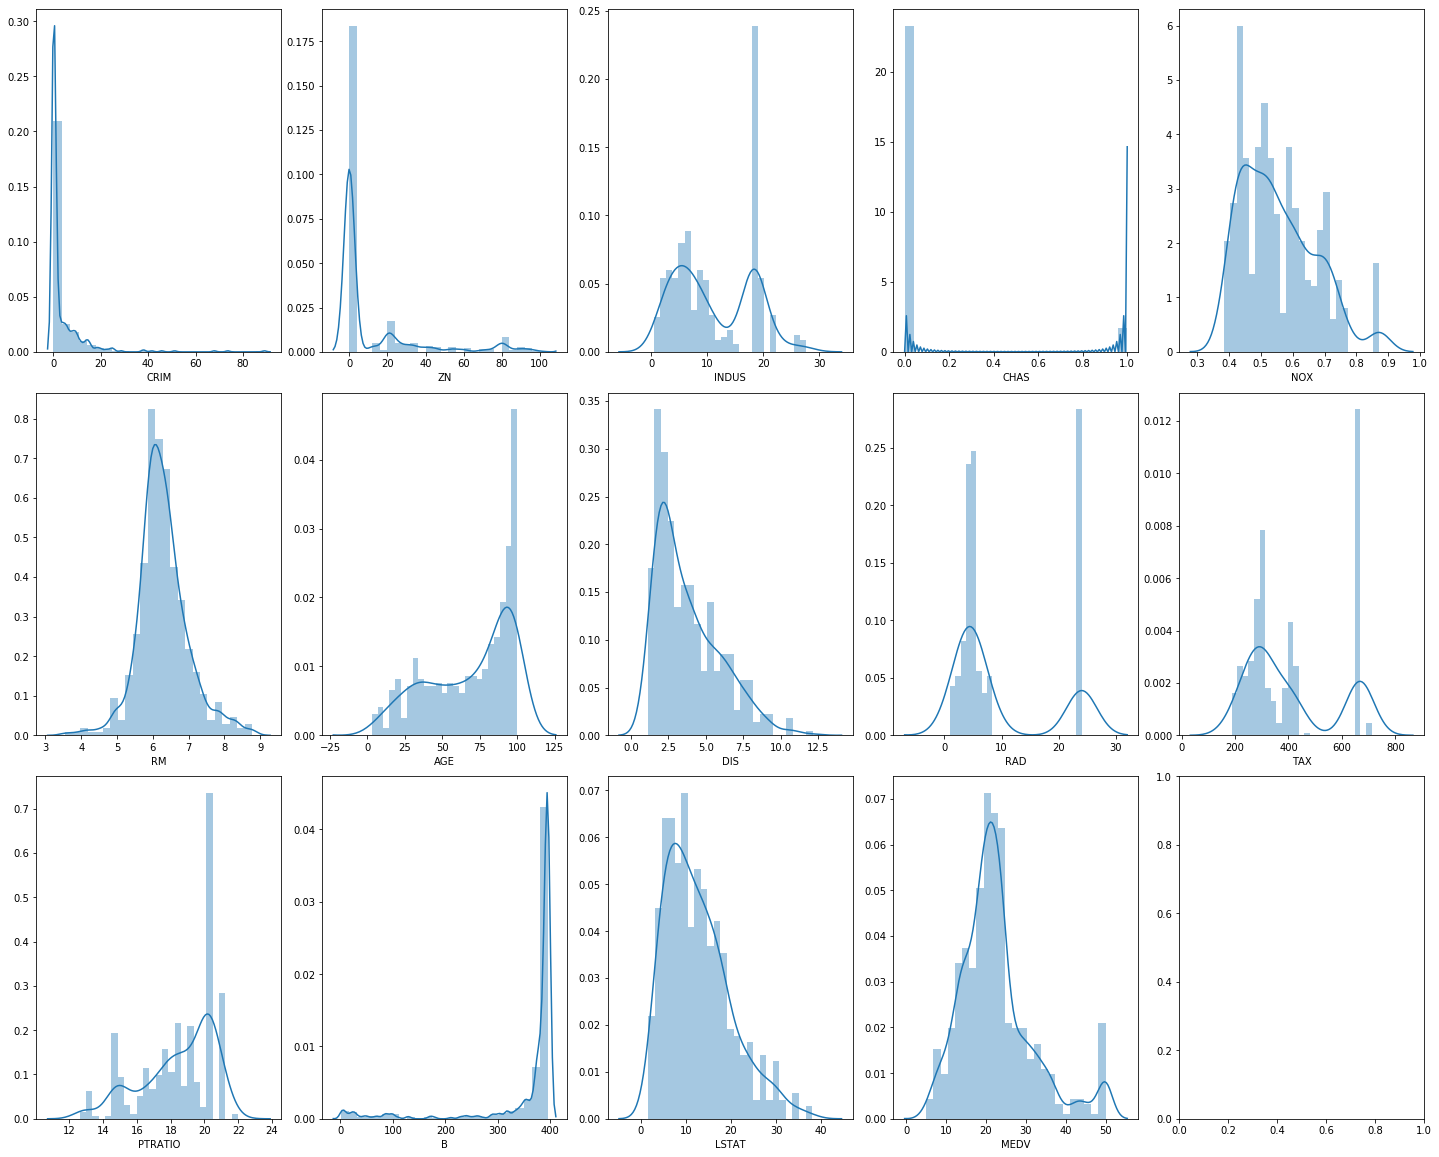

In [87]:
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20,16))
fig.tight_layout(h_pad=2, w_pad=1)
sns.distplot(df['CRIM'], bins=25, ax=axs[0, 0])
sns.distplot(df['ZN'], bins=25, ax=axs[0, 1])
sns.distplot(df['INDUS'], bins=25, ax=axs[0, 2])
sns.distplot(df['CHAS'], bins=25, ax=axs[0, 3])
sns.distplot(df['NOX'], bins=25, ax=axs[0, 4])
sns.distplot(df['RM'], bins=25, ax=axs[1, 0])
sns.distplot(df['AGE'], bins=25, ax=axs[1, 1])
sns.distplot(df['DIS'], bins=25, ax=axs[1, 2])
sns.distplot(df['RAD'], bins=25, ax=axs[1, 3])
sns.distplot(df['TAX'], bins=25, ax=axs[1, 4])
sns.distplot(df['PTRATIO'], bins=25, ax=axs[2, 0])
sns.distplot(df['B'], bins=25, ax=axs[2, 1])
sns.distplot(df['LSTAT'], bins=25, ax=axs[2, 2])
sns.distplot(df['MEDV'], bins=25, ax=axs[2, 3])
plt.show()

From this we can see the distribution for each data column. We can see that the RM values are in a Gaussian Normal distribution. The values for CHAS are binomial with values of either 0 or 1. The distributions for DIS, LSTAT and NOX seem to follow the lognormal distribution. It's also worth noting that the values for RAD are generally centered around 10 in an almost Gaussian distribution except for a large spike around 24. It is quite similar to the TAX distibution.

Another option is to generate boxplots for each variable. This can be useful to sometimes identify other traits of the data.

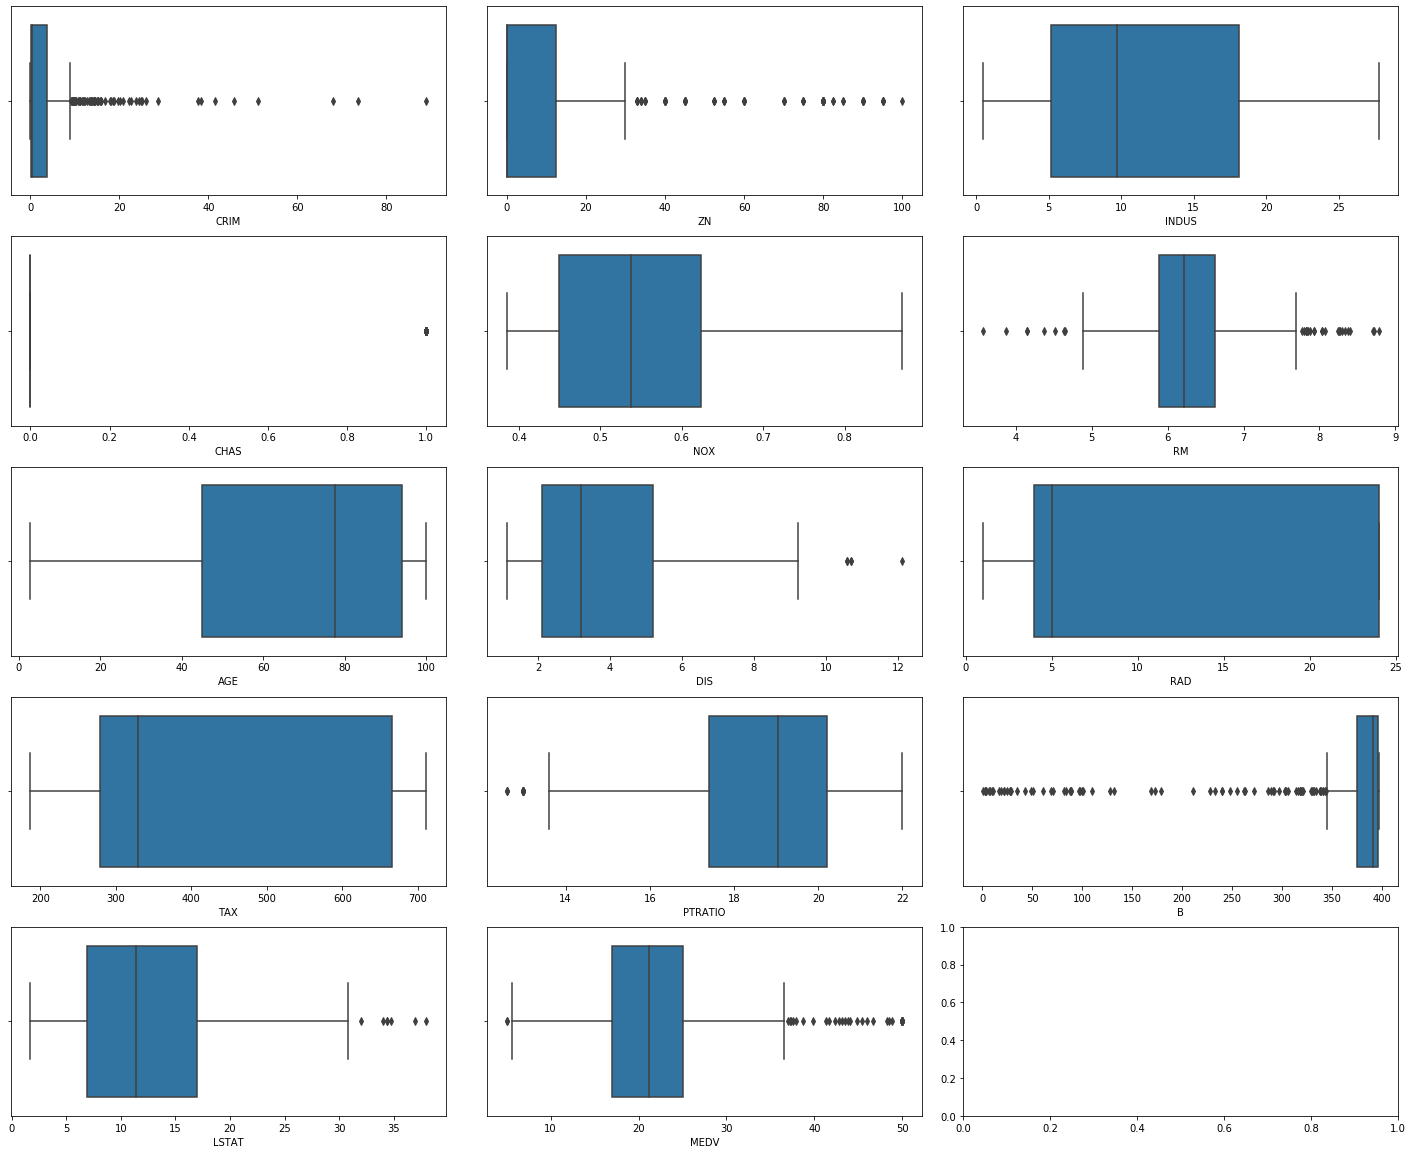

In [88]:
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20,16))
fig.tight_layout(h_pad=2, w_pad=1)
sns.boxplot(x=df['CRIM'], ax=axs[0, 0])
sns.boxplot(x=df['ZN'], ax=axs[0, 1])
sns.boxplot(x=df['INDUS'], ax=axs[0, 2])
sns.boxplot(x=df['CHAS'], ax=axs[1, 0])
sns.boxplot(x=df['NOX'], ax=axs[1, 1])
sns.boxplot(x=df['RM'], ax=axs[1, 2])
sns.boxplot(x=df['AGE'], ax=axs[2, 0])
sns.boxplot(x=df['DIS'], ax=axs[2, 1])
sns.boxplot(x=df['RAD'], ax=axs[2, 2])
sns.boxplot(x=df['TAX'], ax=axs[3, 0])
sns.boxplot(x=df['PTRATIO'], ax=axs[3, 1])
sns.boxplot(x=df['B'], ax=axs[3, 2])
sns.boxplot(x=df['LSTAT'], ax=axs[4, 0])
sns.boxplot(x=df['MEDV'], ax=axs[4, 1])
plt.show()

From this, it can be observed that the values of NOX are all between 0 and 1, with no values outside the 'minimum' or 'maximum' values of the boxplot. For the variable B, there are numerous outliers lower than the value 'minimum' boxplot values. The boxplots are very useful for understanding the median values of each variable.

Another attribute of the datat that might be useful to investigate would be the covariance and correlation of the variables. 
Covariance shows how variables differ from each other (higher this value the more dependent is the relationship) while correlation shows the relationship between them on a scale between -1 and 1 (values close to 1 and -1 indicate either a strong positive or negative relationship). 

In [89]:
df.cov().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,73.987,-40.216,23.992,-0.122,0.420,-1.325,85.405,-6.877,46.848,844.822,5.399,-302.382,27.986,-30.719
ZN,-40.216,543.937,-85.413,-0.253,-1.396,5.113,-373.902,32.629,-63.349,-1236.454,-19.777,373.721,-68.783,77.315
INDUS,23.992,-85.413,47.064,0.110,0.607,-1.888,124.514,-10.228,35.550,833.360,5.692,-223.580,29.580,-30.521
CHAS,-0.122,-0.253,0.110,0.065,0.003,0.016,0.619,-0.053,-0.016,-1.523,-0.067,1.131,-0.098,0.409
NOX,0.420,-1.396,0.607,0.003,0.013,-0.025,2.386,-0.188,0.617,13.046,0.047,-4.021,0.489,-0.455
RM,-1.325,5.113,-1.888,0.016,-0.025,0.494,-4.752,0.304,-1.284,-34.583,-0.541,8.215,-3.080,4.493
AGE,85.405,-373.902,124.514,0.619,2.386,-4.752,792.358,-44.329,111.771,2402.690,15.937,-702.940,121.078,-97.589
DIS,-6.877,32.629,-10.228,-0.053,-0.188,0.304,-44.329,4.434,-9.068,-189.665,-1.060,56.040,-7.473,4.840
RAD,46.848,-63.349,35.550,-0.016,0.617,-1.284,111.771,-9.068,75.816,1335.757,8.761,-353.276,30.385,-30.561
TAX,844.822,-1236.454,833.360,-1.523,13.046,-34.583,2402.690,-189.665,1335.757,28404.759,168.153,-6797.911,654.715,-726.256


In [90]:
df.corr().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


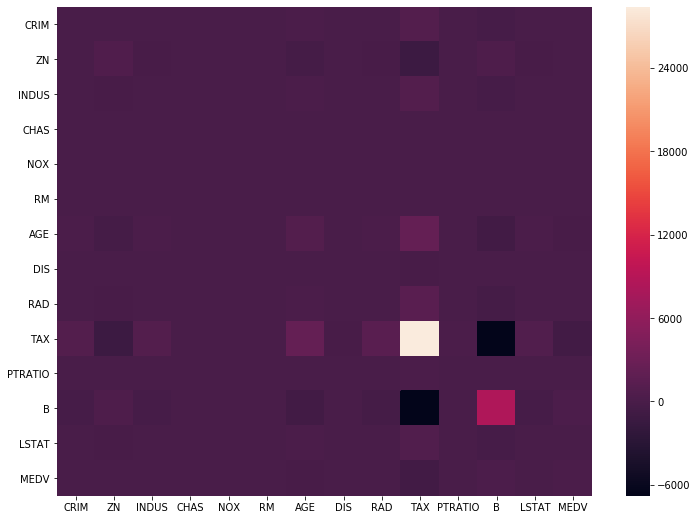

In [91]:
plt.subplots(figsize=(12,9))
covariance_matrix = df.cov().round(20)
sns.heatmap(data=covariance_matrix, annot=False)

Because of the scale and size of the results of the covariance it is very hard to really tell anything from this plot. 

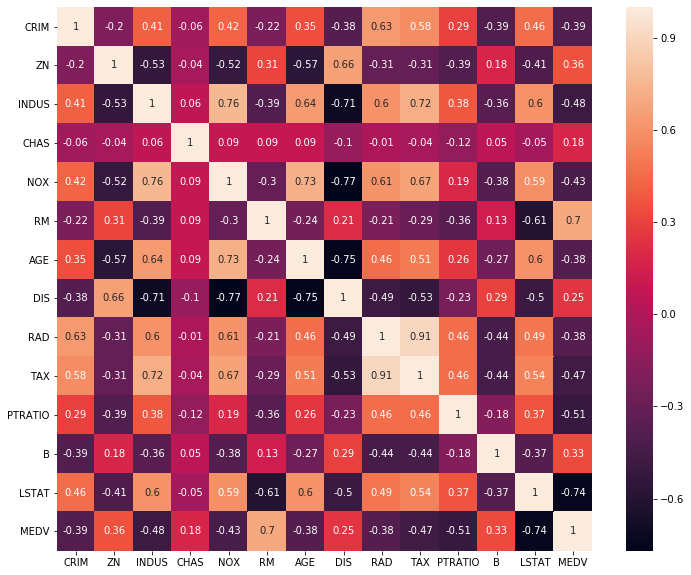

In [92]:
# Adapted from [1]
plt.subplots(figsize=(12,10))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Very light or very dark squares indicate the variables with the highest (either positive or negative) correlation. Some variable pairing that might be worth a closer inspection are LSAT/MEDV, DIS/AGE, TAX/RAD, NOX/INDUS, RM/MEDV

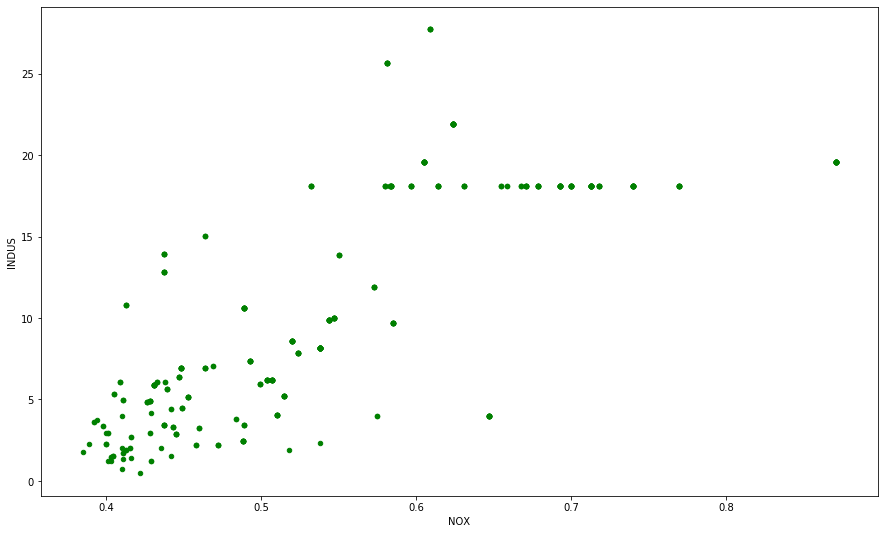

In [93]:
df.plot(kind='scatter',x='NOX',y='INDUS', color="green")
plt.show()

The scatter plot for these variables indicate that there is a clear relationship between NOX and INDUS. As the % of Industrial units increase so does the level of NOX. 

Looking at the correlations matrix results for TAX and RAD, we see a value of 0.91 returned. This would indicate a high correlation between the two variables. However when we look at a scatter plot between them we see that there are a couple of outlier values that skew the correlation results. Looking at the plot it is hard to see any real correlation between them. This example is useful to remind ourselves not to look at single aspects of analysis and jumping to conclusions.

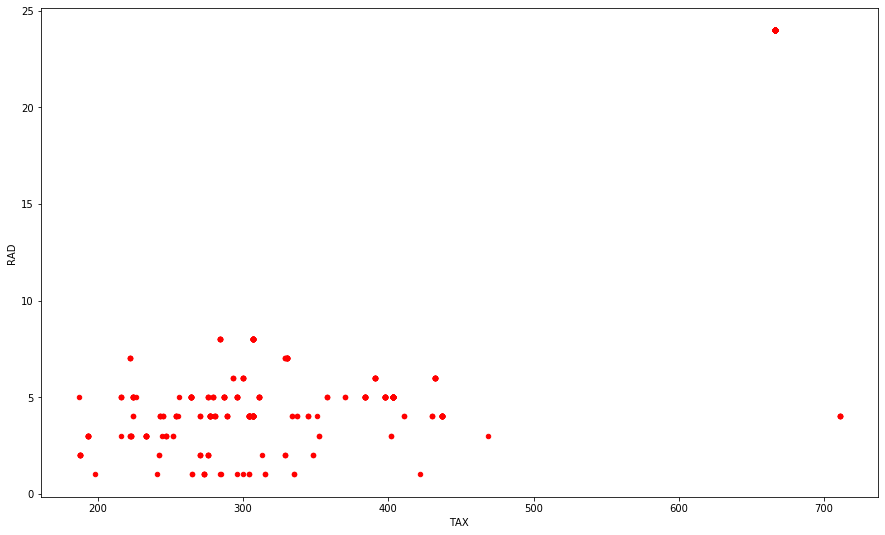

In [94]:
df.plot(kind='scatter',x='TAX',y='RAD', color="red")
plt.show()

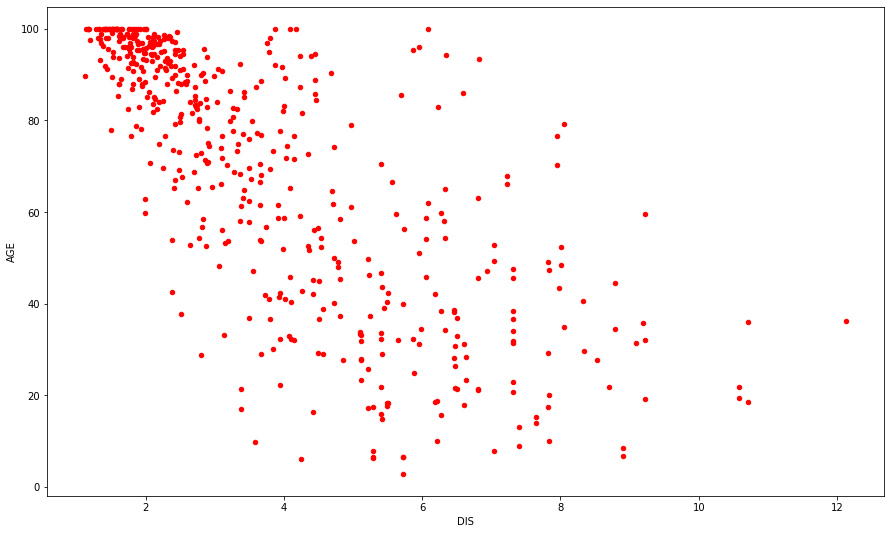

In [95]:
df.plot(kind='scatter',x='DIS',y='AGE',color='red')
plt.show()

It could be infered from this plot that as the AGE decreases the DIS increases. This means that the closer you are to one of the 5 Boston employment centres, the older the house.

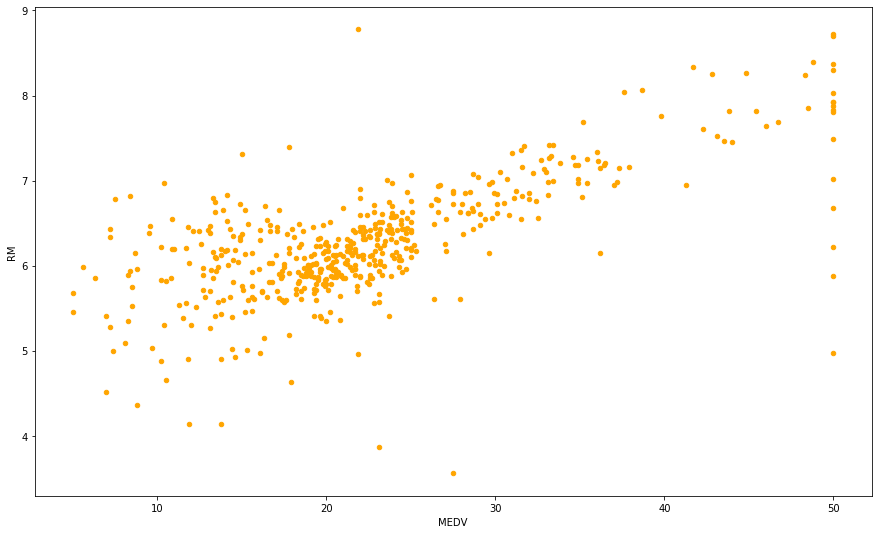

In [96]:
df.plot(kind='scatter',x='MEDV',y='RM',color='orange')
plt.show()

Looking at this scatter plot a trend can be seen here. As the RM increases, so do does MEDV. This would make sense as the more rooms a property has, the higher the proprty value in general. 

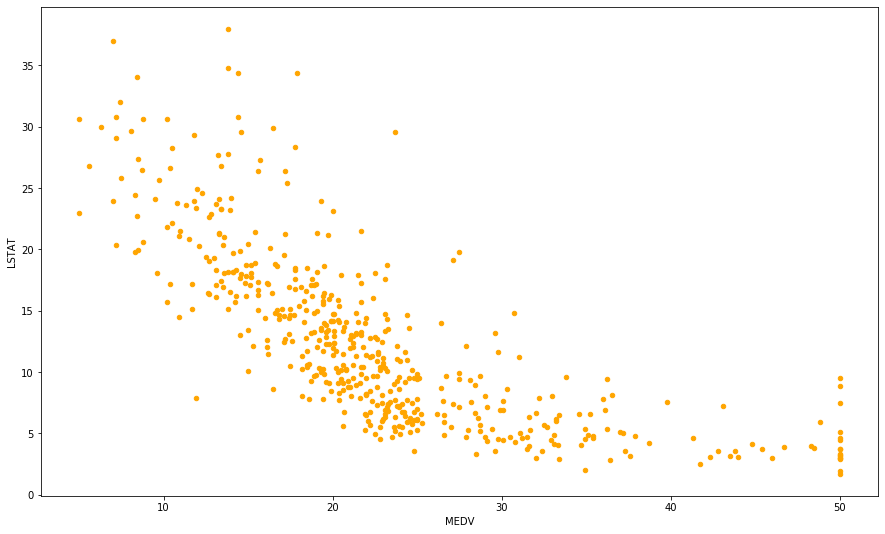

In [97]:
df.plot(kind='scatter',x='MEDV',y='LSTAT',color='orange')
plt.show()

This plot is interesting in that it looks like there is a clear pattern between these two variables. As LSTAT decreases, MEDV increases. A polynominal function could be used to model this pattern.

In [98]:
np.polyfit(df['MEDV'], df['LSTAT'], 1)

array([-0.57275582, 25.55885923])

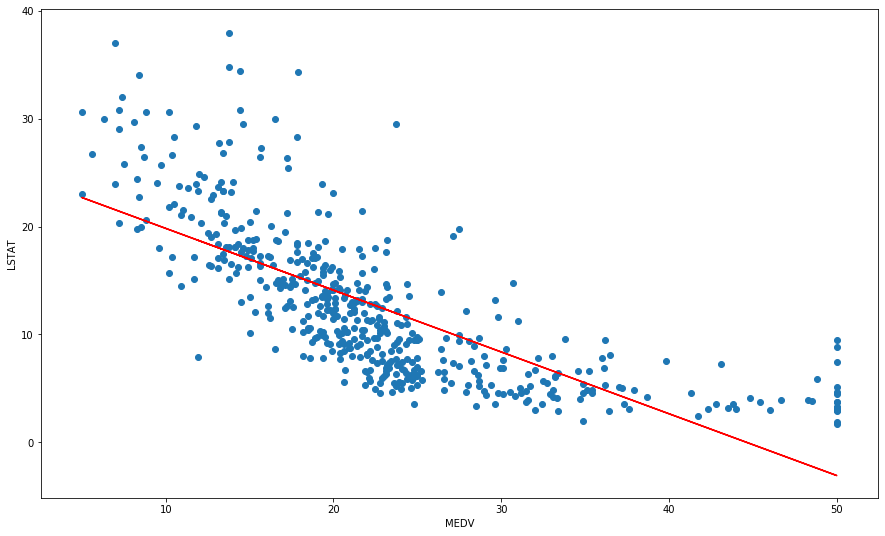

In [99]:
plt.plot(df['MEDV'], df['MEDV'] * -0.5727 + 25.55885, 'r-')
plt.scatter(df['MEDV'], df['LSTAT'])
plt.xlabel('MEDV')
plt.ylabel('LSTAT')
plt.show()

Although the line follows the general shape of the variables, the values for LSTAT bottom out around 3 and do not seem to go any lower however the polynominal line would dip below 0 and continue so it is not the most suitable representation of these variables. 

***
## Section 2 - Inferential

A ttest is a type of inferential statistics test used to determine if there is a significant different between the means of two groups of data which may be related in certain features.

For this experiment I want to see the ttest statistics and pvalues for each variable in the dataset run against the all of the others. From the initial analysis we can see there is no correlation between a lot of the variables but I still think it will be interesting to see this plotted.

In [100]:
df_results = pd.DataFrame(columns=['Var1', 'Var2','ttest Statistic','ttest Pvalue'])
df_results

,Var1,Var2,ttest Statistic,ttest Pvalue


In [101]:
#defining empty lists that will store the results of the ttest loop
v1 = []
v2 = []
S = []
P = []

In [102]:
# Creating a for loop that will run a tt for each variable against each other variable.
for column in df:
    for column1 in df:
        result = ss.ttest_ind(df[column], df[column1])
        #print(column, column1, result.statistic, result.pvalue)
        v1.append(column)
        v2.append(column1)
        S.append(result.statistic)
        P.append(result.pvalue)

In [103]:
df_results['Var1'] = v1
df_results['Var2'] = v2
df_results['ttest Statistic'] = S
df_results['ttest Pvalue'] = P
df_results

,Var1,Var2,ttest Statistic,ttest Pvalue
0,CRIM,CRIM,0.000000,1.000000e+00
1,CRIM,ZN,-7.013196,4.259687e-12
2,CRIM,INDUS,-15.381434,3.988806e-48
3,CRIM,CHAS,9.265024,1.141922e-19
4,CRIM,NOX,7.998610,3.430040e-15
5,CRIM,RM,-6.962202,6.024193e-12
6,CRIM,AGE,-49.646090,3.097115e-273
7,CRIM,DIS,-0.461087,6.448357e-01
8,CRIM,RAD,-10.909390,2.842063e-26
9,CRIM,TAX,-53.934427,1.251318e-299


In [104]:
# Removing the rows where the ttest was conducted on the same set of values eg ss.ttest_ind(CRIM, CRIM)
df_results = df_results.drop([0,15,30,45,60,75,90,105,120,135,150,165,180,195], axis=0)

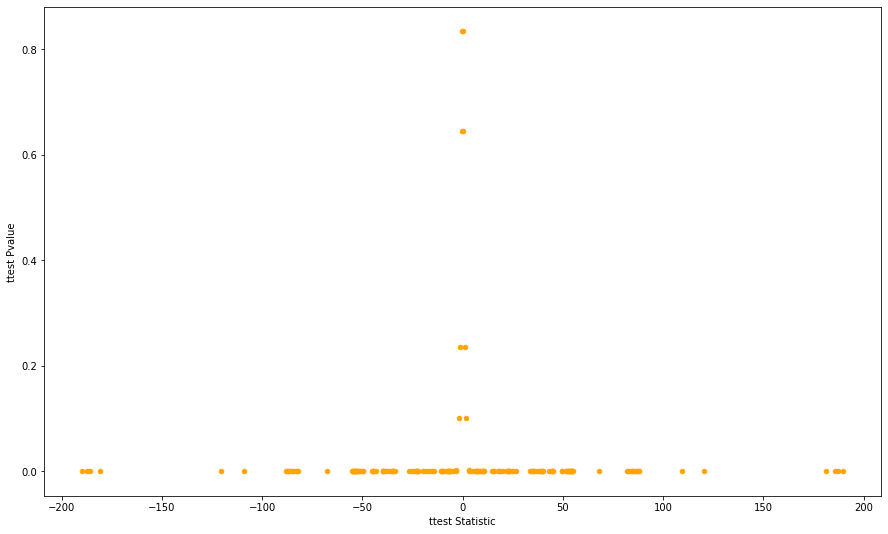

In [105]:
df_results.plot(kind='scatter',x='ttest Statistic',y='ttest Pvalue',color='orange')
plt.show()

Looking at this scatter plot, it looks like there are only 2 pairs of variables with a ttest pvalue above 0.5%, that might be significant. First we'll sort the data to find the tests where the P value is greater than 0.5%.

In [106]:
df_results.sort_values(by='ttest Pvalue', ascending=False).head(10)

,Var1,Var2,ttest Statistic,ttest Pvalue
29,INDUS,ZN,-0.209911,0.833780
16,ZN,INDUS,0.209911,0.833780
98,DIS,CRIM,0.461087,0.644836
7,CRIM,DIS,-0.461087,0.644836
169,LSTAT,ZN,1.189155,0.234658
26,ZN,LSTAT,-1.189155,0.234658
113,RAD,ZN,-1.639298,0.101463
22,ZN,RAD,1.639298,0.101463
36,INDUS,RAD,3.221156,0.001318
114,RAD,INDUS,-3.221156,0.001318


INDUS / ZN and DIS / CRIM are the two pairs of variables that indicate there is a relationship between them, based on the ttest results. We can plot these on a scatter plot to give us a different view to what is going on here.

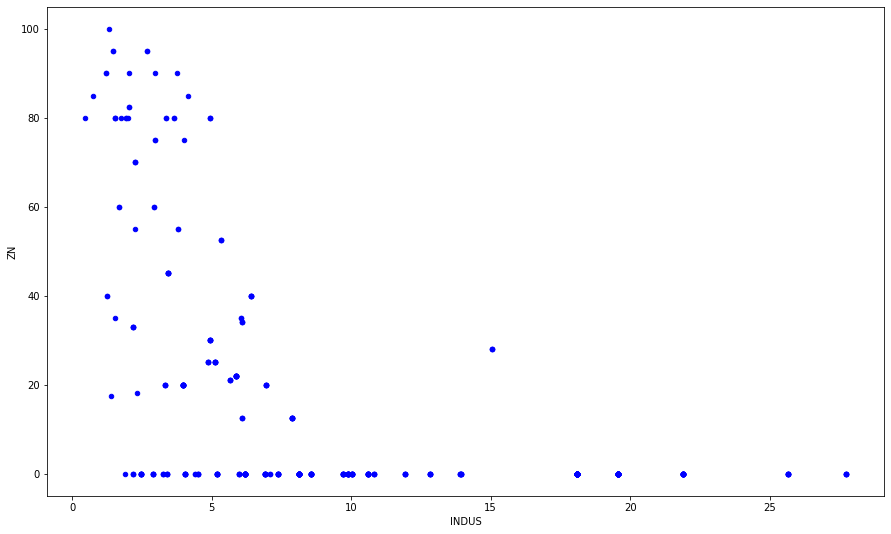

In [107]:
df.plot(kind='scatter',x='INDUS',y='ZN',color='blue')
plt.show()

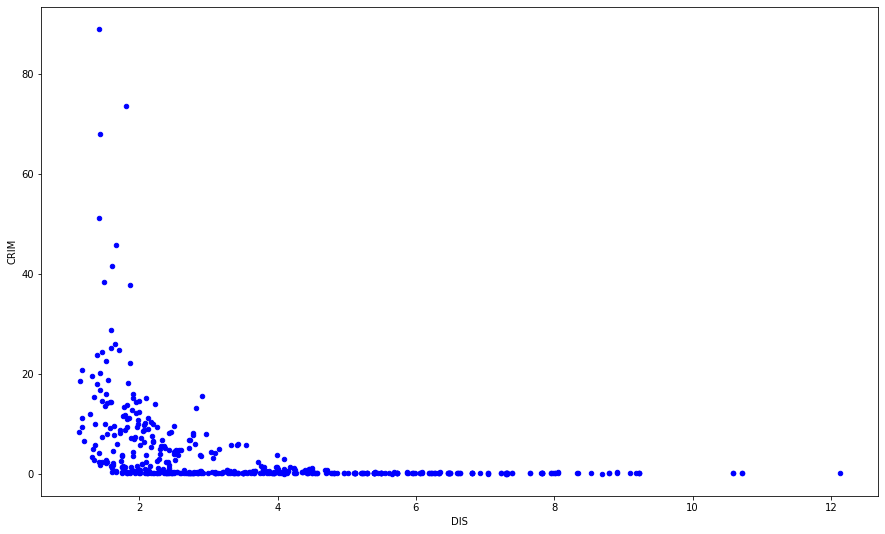

In [108]:
df.plot(kind='scatter',x='DIS',y='CRIM',color='blue')
plt.show()

From this, we could infer that as the proportion of non retail business per town (INDUS) increases the proportion of residential land zones (ZN) decreased. Similarly, as the distance to one of the Boston Employment Centre (DIS) increases, the per capaita crime rate decreases.

To look at the specific case of whether there is a signiﬁcant diﬀerence in median house prices between houses that are along the Charles river and those that aren’t, we can look at the ttest results for these two variables.

In [109]:
ss.ttest_ind(df['CHAS'], df['MEDV'])

Ttest_indResult(statistic=-54.9210289745203, pvalue=1.4651540072350996e-305)

From this result we would accept the null hypothesis and conclude that there is no significant relationship between these variables.

However it could also be useful to see these two variables in a scatter plot. (For the CHAS variable, 1 indicates that the house is along the Charles river while 0 means it is not)

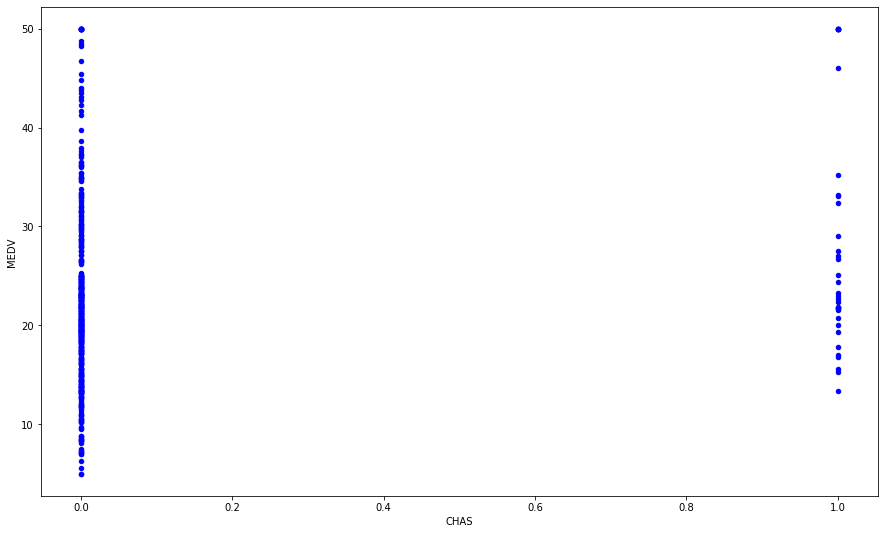

In [110]:
df.plot(kind='scatter',x='CHAS',y='MEDV',color='blue')
plt.show()

Looking at the scatter plot, it looks like the MEDV is pretty evenly distributed for both sets of values of CHAS. There are more houses in the lowest MEDV values when CHAS is 0 but if you were to pick any value of MEDV, it would not be possible to conclude if CHAS was 0 or 1.

In [111]:
# creating 2 dataframes based on the values of the CHAS variable
df_chas_0 = df[df['CHAS'] == 0]
df_chas_1 = df[df['CHAS'] == 1]

In [112]:
# Getting the mean values for all values in both new dataframes.
print (df_chas_0.mean())

CRIM         3.744447
ZN          11.634820
INDUS       11.019193
CHAS         0.000000
NOX          0.551817
RM           6.267174
AGE         67.911677
DIS          3.851915
RAD          9.566879
TAX        409.870488
PTRATIO     18.527176
B          355.461040
LSTAT       12.757941
MEDV        22.093843
dtype: float64


In [113]:
print (df_chas_1.mean())

CRIM         1.851670
ZN           7.714286
INDUS       12.719143
CHAS         1.000000
NOX          0.593426
RM           6.519600
AGE         77.500000
DIS          3.029709
RAD          9.314286
TAX        386.257143
PTRATIO     17.491429
B          372.997429
LSTAT       11.241714
MEDV        28.440000
dtype: float64


With these we can see that the average house price located along the Charles river is 28.4 (28,400 dollars) compared with 22.1 (22,100 dollars) for those not along the river.

The conclusion I would come to based on the information available is that although the average house prices are slightly higher located along the Charles river is no major correlation between MEDV and CHAS.

## Section 3 - Predict

To predict the house price we will first select what variables will be used. All variables could be used but if there is no relationship them and the MEDV variable, it may not be necessary. The results of the ttests can be looked at, specifically for MEDV. We will first look at them and sort ascending according to ttest Pvalue.

In [114]:
medv_results = df_results.loc[df_results['Var1'] == 'MEDV']

In [115]:
medv_results.sort_values(by='ttest Pvalue', ascending=False)

,Var1,Var2,ttest Statistic,ttest Pvalue
192,MEDV,PTRATIO,9.706960,2.332590e-21
183,MEDV,ZN,10.021561,1.337148e-22
194,MEDV,LSTAT,19.086255,1.381320e-69
184,MEDV,INDUS,22.341709,3.640811e-90
190,MEDV,RAD,23.059894,7.311700e-95
182,MEDV,CRIM,33.795968,4.137606e-168
188,MEDV,AGE,-34.973905,3.209462e-176
187,MEDV,RM,39.624611,6.490168e-208
189,MEDV,DIS,44.673237,2.033628e-241
191,MEDV,TAX,-51.403010,3.613063e-284


From this, it can be observed that although none of the variable have a ttest value above 5%, the top 5 variables that might indicate some relationship with MEDV are PTRATIO, ZN, LSTAT, INDUS and RAD. These 5 will be selected to try and predict the value of MEDV.

RM will also be added to the inputs as it could be observed from the scatter plot against MEDV there appears to be relationship between these. 

First the inputs and outputs will be declared.

In [116]:
inputs = df[['PTRATIO', 'ZN', 'LSTAT', 'INDUS', 'RAD', 'RM']]
inputsall = df[['PTRATIO', 'ZN', 'LSTAT', 'INDUS', 'RAD', 'CRIM', 'AGE', 'RM', 'DIS', 'TAX', 'NOX', 'CHAS', 'B']]

In [117]:
outputs = df[['MEDV']]

In [118]:
# Start a neural network, building it by layers.
model = kr.models.Sequential()

# Add a hidden layer with 64 neurons and an input layer with 6.
model.add(kr.layers.Dense(64, input_dim=6, activation='relu'))
model.add(kr.layers.Dense(10, activation="softplus"))
model.add(kr.layers.Dense(10, activation="relu"))
model.add(kr.layers.Dense(1, activation="softplus"))

# Build the graph./ Try loss mean_squared_error as well.
model.compile(loss='mean_squared_error', optimizer='nadam', metrics=['accuracy', 'mae'])

I settled on this configuration after numerour tests involving different activations such as linear sigmoid and tanh. The optimizer was also tuned after trying different optimizers like sgd and Adam. I found Nadam to be significantly better over other optimizers like Adam [3]. 

In [119]:
# Train the neural network.
history = model.fit(inputs, outputs, validation_split=.2, epochs=1000, batch_size=30)

Train on 404 samples, validate on 102 samples
Epoch 1/1000
404/404 [==============================] - 0s 289us/step - loss: 640.5539 - accuracy: 0.0000e+00 - mae: 23.5614 - val_loss: 205.4774 - val_accuracy: 0.0000e+00 - val_mae: 13.3299
Epoch 2/1000
404/404 [==============================] - 0s 35us/step - loss: 398.7031 - accuracy: 0.0000e+00 - mae: 17.5657 - val_loss: 41.1453 - val_accuracy: 0.0000e+00 - val_mae: 5.2471
Epoch 3/1000
404/404 [==============================] - 0s 35us/step - loss: 153.8265 - accuracy: 0.0025 - mae: 9.6599 - val_loss: 191.3319 - val_accuracy: 0.0000e+00 - val_mae: 12.4246
Epoch 4/1000
404/404 [==============================] - 0s 35us/step - loss: 111.2260 - accuracy: 0.0025 - mae: 7.7243 - val_loss: 102.8935 - val_accuracy: 0.0000e+00 - val_mae: 8.9817
Epoch 5/1000
404/404 [==============================] - 0s 35us/step - loss: 87.0488 - accuracy: 0.0074 - mae: 6.7460 - val_loss: 70.6973 - val_accuracy: 0.0000e+00 - val_mae: 7.4089
Epoch 6/1000
404/40

404/404 [==============================] - 0s 40us/step - loss: 18.8750 - accuracy: 0.0124 - mae: 3.0913 - val_loss: 21.1126 - val_accuracy: 0.0196 - val_mae: 3.3969
Epoch 46/1000
404/404 [==============================] - 0s 37us/step - loss: 16.9509 - accuracy: 0.0099 - mae: 2.9035 - val_loss: 20.6134 - val_accuracy: 0.0196 - val_mae: 3.3947
Epoch 47/1000
404/404 [==============================] - 0s 32us/step - loss: 16.2514 - accuracy: 0.0124 - mae: 2.8027 - val_loss: 20.0513 - val_accuracy: 0.0196 - val_mae: 3.3732
Epoch 48/1000
404/404 [==============================] - 0s 35us/step - loss: 17.2411 - accuracy: 0.0099 - mae: 2.9547 - val_loss: 46.5860 - val_accuracy: 0.0098 - val_mae: 5.5151
Epoch 49/1000
404/404 [==============================] - 0s 32us/step - loss: 17.5199 - accuracy: 0.0124 - mae: 2.9459 - val_loss: 24.4338 - val_accuracy: 0.0000e+00 - val_mae: 3.6875
Epoch 50/1000
404/404 [==============================] - 0s 32us/step - loss: 16.1079 - accuracy: 0.0124 - mae

404/404 [==============================] - 0s 35us/step - loss: 14.8934 - accuracy: 0.0173 - mae: 2.6159 - val_loss: 20.4390 - val_accuracy: 0.0098 - val_mae: 3.3446
Epoch 91/1000
404/404 [==============================] - 0s 39us/step - loss: 14.3176 - accuracy: 0.0198 - mae: 2.5568 - val_loss: 19.9647 - val_accuracy: 0.0196 - val_mae: 3.3531
Epoch 92/1000
404/404 [==============================] - 0s 42us/step - loss: 14.2038 - accuracy: 0.0198 - mae: 2.5883 - val_loss: 20.3325 - val_accuracy: 0.0098 - val_mae: 3.3380
Epoch 93/1000
404/404 [==============================] - 0s 39us/step - loss: 14.0039 - accuracy: 0.0124 - mae: 2.5264 - val_loss: 19.3663 - val_accuracy: 0.0196 - val_mae: 3.3063
Epoch 94/1000
404/404 [==============================] - 0s 37us/step - loss: 14.8929 - accuracy: 0.0198 - mae: 2.5870 - val_loss: 23.0229 - val_accuracy: 0.0000e+00 - val_mae: 3.5592
Epoch 95/1000
404/404 [==============================] - 0s 37us/step - loss: 14.2597 - accuracy: 0.0223 - mae

404/404 [==============================] - 0s 37us/step - loss: 13.2951 - accuracy: 0.0173 - mae: 2.4348 - val_loss: 19.7628 - val_accuracy: 0.0000e+00 - val_mae: 3.4746
Epoch 136/1000
404/404 [==============================] - 0s 39us/step - loss: 12.6904 - accuracy: 0.0198 - mae: 2.3863 - val_loss: 18.9954 - val_accuracy: 0.0000e+00 - val_mae: 3.2429
Epoch 137/1000
404/404 [==============================] - 0s 35us/step - loss: 12.0208 - accuracy: 0.0198 - mae: 2.2566 - val_loss: 19.3635 - val_accuracy: 0.0098 - val_mae: 3.2554
Epoch 138/1000
404/404 [==============================] - 0s 37us/step - loss: 12.4011 - accuracy: 0.0198 - mae: 2.3702 - val_loss: 24.0228 - val_accuracy: 0.0098 - val_mae: 3.6783
Epoch 139/1000
404/404 [==============================] - 0s 35us/step - loss: 14.0908 - accuracy: 0.0223 - mae: 2.5781 - val_loss: 19.2713 - val_accuracy: 0.0098 - val_mae: 3.3254
Epoch 140/1000
404/404 [==============================] - 0s 37us/step - loss: 12.4215 - accuracy: 0.0

404/404 [==============================] - 0s 35us/step - loss: 12.2872 - accuracy: 0.0198 - mae: 2.3328 - val_loss: 19.0987 - val_accuracy: 0.0196 - val_mae: 3.2446
Epoch 181/1000
404/404 [==============================] - 0s 35us/step - loss: 11.2494 - accuracy: 0.0297 - mae: 2.2580 - val_loss: 19.3298 - val_accuracy: 0.0098 - val_mae: 3.3122
Epoch 182/1000
404/404 [==============================] - 0s 37us/step - loss: 11.0529 - accuracy: 0.0272 - mae: 2.2355 - val_loss: 19.2019 - val_accuracy: 0.0098 - val_mae: 3.3369
Epoch 183/1000
404/404 [==============================] - 0s 32us/step - loss: 11.3973 - accuracy: 0.0124 - mae: 2.2848 - val_loss: 21.5594 - val_accuracy: 0.0000e+00 - val_mae: 3.4259
Epoch 184/1000
404/404 [==============================] - 0s 39us/step - loss: 12.1642 - accuracy: 0.0248 - mae: 2.3703 - val_loss: 19.7005 - val_accuracy: 0.0196 - val_mae: 3.2815
Epoch 185/1000
404/404 [==============================] - 0s 44us/step - loss: 11.2238 - accuracy: 0.0198 

404/404 [==============================] - 0s 30us/step - loss: 10.8637 - accuracy: 0.0173 - mae: 2.2571 - val_loss: 19.2636 - val_accuracy: 0.0098 - val_mae: 3.2924
Epoch 226/1000
404/404 [==============================] - 0s 30us/step - loss: 10.9013 - accuracy: 0.0149 - mae: 2.2515 - val_loss: 19.5905 - val_accuracy: 0.0098 - val_mae: 3.3608
Epoch 227/1000
404/404 [==============================] - 0s 30us/step - loss: 12.3224 - accuracy: 0.0173 - mae: 2.4142 - val_loss: 19.7262 - val_accuracy: 0.0000e+00 - val_mae: 3.4195
Epoch 228/1000
404/404 [==============================] - 0s 32us/step - loss: 10.4266 - accuracy: 0.0149 - mae: 2.1697 - val_loss: 19.1406 - val_accuracy: 0.0000e+00 - val_mae: 3.4015
Epoch 229/1000
404/404 [==============================] - 0s 32us/step - loss: 11.0035 - accuracy: 0.0124 - mae: 2.2857 - val_loss: 22.2538 - val_accuracy: 0.0098 - val_mae: 3.4975
Epoch 230/1000
404/404 [==============================] - 0s 32us/step - loss: 10.4643 - accuracy: 0.0

404/404 [==============================] - 0s 35us/step - loss: 10.3322 - accuracy: 0.0149 - mae: 2.2423 - val_loss: 19.8492 - val_accuracy: 0.0196 - val_mae: 3.3017
Epoch 271/1000
404/404 [==============================] - 0s 32us/step - loss: 9.7679 - accuracy: 0.0149 - mae: 2.1337 - val_loss: 19.0193 - val_accuracy: 0.0098 - val_mae: 3.3320
Epoch 272/1000
404/404 [==============================] - 0s 30us/step - loss: 10.8447 - accuracy: 0.0149 - mae: 2.2968 - val_loss: 19.3323 - val_accuracy: 0.0098 - val_mae: 3.2499
Epoch 273/1000
404/404 [==============================] - 0s 32us/step - loss: 10.1308 - accuracy: 0.0074 - mae: 2.1897 - val_loss: 32.7779 - val_accuracy: 0.0098 - val_mae: 4.3990
Epoch 274/1000
404/404 [==============================] - 0s 35us/step - loss: 10.8073 - accuracy: 0.0248 - mae: 2.2622 - val_loss: 19.9002 - val_accuracy: 0.0098 - val_mae: 3.2992
Epoch 275/1000
404/404 [==============================] - 0s 42us/step - loss: 9.6627 - accuracy: 0.0149 - mae:

404/404 [==============================] - 0s 30us/step - loss: 9.7267 - accuracy: 0.0149 - mae: 2.1654 - val_loss: 20.5657 - val_accuracy: 0.0098 - val_mae: 3.3051
Epoch 316/1000
404/404 [==============================] - 0s 35us/step - loss: 9.6127 - accuracy: 0.0149 - mae: 2.1037 - val_loss: 22.2514 - val_accuracy: 0.0196 - val_mae: 3.4412
Epoch 317/1000
404/404 [==============================] - 0s 32us/step - loss: 9.7158 - accuracy: 0.0149 - mae: 2.1433 - val_loss: 20.1364 - val_accuracy: 0.0098 - val_mae: 3.3233
Epoch 318/1000
404/404 [==============================] - 0s 32us/step - loss: 9.3100 - accuracy: 0.0198 - mae: 2.1042 - val_loss: 20.7712 - val_accuracy: 0.0098 - val_mae: 3.3263
Epoch 319/1000
404/404 [==============================] - 0s 32us/step - loss: 9.8357 - accuracy: 0.0074 - mae: 2.1727 - val_loss: 19.7488 - val_accuracy: 0.0196 - val_mae: 3.2679
Epoch 320/1000
404/404 [==============================] - 0s 34us/step - loss: 9.1027 - accuracy: 0.0248 - mae: 2.0

404/404 [==============================] - 0s 42us/step - loss: 8.7458 - accuracy: 0.0149 - mae: 2.0496 - val_loss: 20.5316 - val_accuracy: 0.0098 - val_mae: 3.4183
Epoch 361/1000
404/404 [==============================] - 0s 37us/step - loss: 9.1114 - accuracy: 0.0124 - mae: 2.0432 - val_loss: 19.8361 - val_accuracy: 0.0098 - val_mae: 3.4261
Epoch 362/1000
404/404 [==============================] - 0s 32us/step - loss: 8.7546 - accuracy: 0.0149 - mae: 2.0621 - val_loss: 22.1627 - val_accuracy: 0.0196 - val_mae: 3.4072
Epoch 363/1000
404/404 [==============================] - 0s 32us/step - loss: 9.5346 - accuracy: 0.0322 - mae: 2.1953 - val_loss: 20.9621 - val_accuracy: 0.0098 - val_mae: 3.3449
Epoch 364/1000
404/404 [==============================] - 0s 32us/step - loss: 8.9754 - accuracy: 0.0173 - mae: 2.0688 - val_loss: 21.1429 - val_accuracy: 0.0098 - val_mae: 3.3546
Epoch 365/1000
404/404 [==============================] - 0s 32us/step - loss: 8.8601 - accuracy: 0.0223 - mae: 2.0

404/404 [==============================] - 0s 35us/step - loss: 8.4138 - accuracy: 0.0248 - mae: 1.9744 - val_loss: 21.8735 - val_accuracy: 0.0000e+00 - val_mae: 3.7221
Epoch 406/1000
404/404 [==============================] - 0s 35us/step - loss: 9.3539 - accuracy: 0.0173 - mae: 2.1453 - val_loss: 19.8962 - val_accuracy: 0.0196 - val_mae: 3.3135
Epoch 407/1000
404/404 [==============================] - 0s 32us/step - loss: 8.8969 - accuracy: 0.0099 - mae: 2.0881 - val_loss: 20.9768 - val_accuracy: 0.0196 - val_mae: 3.3081
Epoch 408/1000
404/404 [==============================] - 0s 30us/step - loss: 8.6611 - accuracy: 0.0173 - mae: 2.0373 - val_loss: 21.1103 - val_accuracy: 0.0098 - val_mae: 3.3027
Epoch 409/1000
404/404 [==============================] - 0s 42us/step - loss: 8.0894 - accuracy: 0.0149 - mae: 1.9619 - val_loss: 25.0089 - val_accuracy: 0.0098 - val_mae: 3.6552
Epoch 410/1000
404/404 [==============================] - 0s 37us/step - loss: 8.8885 - accuracy: 0.0223 - mae:

404/404 [==============================] - 0s 35us/step - loss: 7.8740 - accuracy: 0.0223 - mae: 1.9783 - val_loss: 21.6300 - val_accuracy: 0.0098 - val_mae: 3.3471
Epoch 451/1000
404/404 [==============================] - 0s 35us/step - loss: 7.9906 - accuracy: 0.0297 - mae: 1.9553 - val_loss: 20.9928 - val_accuracy: 0.0098 - val_mae: 3.5100
Epoch 452/1000
404/404 [==============================] - 0s 32us/step - loss: 8.0554 - accuracy: 0.0198 - mae: 1.9676 - val_loss: 20.4272 - val_accuracy: 0.0098 - val_mae: 3.3337
Epoch 453/1000
404/404 [==============================] - 0s 35us/step - loss: 7.8710 - accuracy: 0.0149 - mae: 1.9590 - val_loss: 20.4413 - val_accuracy: 0.0098 - val_mae: 3.4488
Epoch 454/1000
404/404 [==============================] - 0s 35us/step - loss: 8.0389 - accuracy: 0.0198 - mae: 1.9627 - val_loss: 20.8265 - val_accuracy: 0.0098 - val_mae: 3.4750
Epoch 455/1000
404/404 [==============================] - 0s 35us/step - loss: 8.0621 - accuracy: 0.0124 - mae: 1.9

404/404 [==============================] - 0s 32us/step - loss: 7.9743 - accuracy: 0.0223 - mae: 1.9570 - val_loss: 21.6815 - val_accuracy: 0.0000e+00 - val_mae: 3.6986
Epoch 496/1000
404/404 [==============================] - 0s 32us/step - loss: 8.3675 - accuracy: 0.0173 - mae: 2.0026 - val_loss: 22.3229 - val_accuracy: 0.0294 - val_mae: 3.3789
Epoch 497/1000
404/404 [==============================] - 0s 35us/step - loss: 7.6347 - accuracy: 0.0297 - mae: 1.8836 - val_loss: 23.2783 - val_accuracy: 0.0196 - val_mae: 3.4498
Epoch 498/1000
404/404 [==============================] - 0s 32us/step - loss: 7.9827 - accuracy: 0.0248 - mae: 1.9299 - val_loss: 21.3961 - val_accuracy: 0.0098 - val_mae: 3.4849
Epoch 499/1000
404/404 [==============================] - 0s 35us/step - loss: 7.7651 - accuracy: 0.0173 - mae: 1.8793 - val_loss: 23.2422 - val_accuracy: 0.0196 - val_mae: 3.4948
Epoch 500/1000
404/404 [==============================] - 0s 37us/step - loss: 7.9281 - accuracy: 0.0124 - mae:

404/404 [==============================] - 0s 30us/step - loss: 7.6180 - accuracy: 0.0322 - mae: 1.9465 - val_loss: 21.8600 - val_accuracy: 0.0000e+00 - val_mae: 3.6193
Epoch 541/1000
404/404 [==============================] - 0s 32us/step - loss: 7.3783 - accuracy: 0.0198 - mae: 1.8820 - val_loss: 23.2272 - val_accuracy: 0.0000e+00 - val_mae: 3.4758
Epoch 542/1000
404/404 [==============================] - 0s 32us/step - loss: 7.6005 - accuracy: 0.0347 - mae: 1.8814 - val_loss: 21.4043 - val_accuracy: 0.0098 - val_mae: 3.4707
Epoch 543/1000
404/404 [==============================] - 0s 35us/step - loss: 7.5491 - accuracy: 0.0198 - mae: 1.8837 - val_loss: 21.6406 - val_accuracy: 0.0196 - val_mae: 3.3050
Epoch 544/1000
404/404 [==============================] - 0s 32us/step - loss: 7.6676 - accuracy: 0.0149 - mae: 1.9538 - val_loss: 20.9964 - val_accuracy: 0.0196 - val_mae: 3.3221
Epoch 545/1000
404/404 [==============================] - 0s 35us/step - loss: 7.9264 - accuracy: 0.0198 - 

404/404 [==============================] - 0s 35us/step - loss: 7.1066 - accuracy: 0.0297 - mae: 1.8067 - val_loss: 21.3774 - val_accuracy: 0.0098 - val_mae: 3.4600
Epoch 586/1000
404/404 [==============================] - 0s 35us/step - loss: 7.3223 - accuracy: 0.0223 - mae: 1.8591 - val_loss: 21.2812 - val_accuracy: 0.0098 - val_mae: 3.4078
Epoch 587/1000
404/404 [==============================] - 0s 35us/step - loss: 7.0783 - accuracy: 0.0198 - mae: 1.8032 - val_loss: 21.9830 - val_accuracy: 0.0098 - val_mae: 3.3920
Epoch 588/1000
404/404 [==============================] - 0s 30us/step - loss: 7.1441 - accuracy: 0.0223 - mae: 1.8218 - val_loss: 21.6112 - val_accuracy: 0.0098 - val_mae: 3.3754
Epoch 589/1000
404/404 [==============================] - 0s 32us/step - loss: 7.0323 - accuracy: 0.0248 - mae: 1.8302 - val_loss: 21.4019 - val_accuracy: 0.0098 - val_mae: 3.4880
Epoch 590/1000
404/404 [==============================] - 0s 32us/step - loss: 6.9187 - accuracy: 0.0347 - mae: 1.7

404/404 [==============================] - 0s 30us/step - loss: 6.9026 - accuracy: 0.0223 - mae: 1.7931 - val_loss: 21.4341 - val_accuracy: 0.0098 - val_mae: 3.4496
Epoch 631/1000
404/404 [==============================] - 0s 30us/step - loss: 7.1081 - accuracy: 0.0223 - mae: 1.8457 - val_loss: 22.6144 - val_accuracy: 0.0000e+00 - val_mae: 3.6993
Epoch 632/1000
404/404 [==============================] - 0s 32us/step - loss: 6.8356 - accuracy: 0.0198 - mae: 1.7989 - val_loss: 21.8840 - val_accuracy: 0.0000e+00 - val_mae: 3.6724
Epoch 633/1000
404/404 [==============================] - 0s 30us/step - loss: 7.1531 - accuracy: 0.0223 - mae: 1.8250 - val_loss: 21.9195 - val_accuracy: 0.0098 - val_mae: 3.4649
Epoch 634/1000
404/404 [==============================] - 0s 30us/step - loss: 6.7585 - accuracy: 0.0149 - mae: 1.7941 - val_loss: 24.4566 - val_accuracy: 0.0098 - val_mae: 3.5406
Epoch 635/1000
404/404 [==============================] - 0s 30us/step - loss: 7.3448 - accuracy: 0.0297 - 

404/404 [==============================] - 0s 35us/step - loss: 6.8593 - accuracy: 0.0347 - mae: 1.7735 - val_loss: 22.5394 - val_accuracy: 0.0098 - val_mae: 3.4731
Epoch 676/1000
404/404 [==============================] - 0s 37us/step - loss: 6.5733 - accuracy: 0.0322 - mae: 1.7744 - val_loss: 22.2108 - val_accuracy: 0.0098 - val_mae: 3.4801
Epoch 677/1000
404/404 [==============================] - 0s 37us/step - loss: 6.5305 - accuracy: 0.0297 - mae: 1.7600 - val_loss: 21.5842 - val_accuracy: 0.0098 - val_mae: 3.4603
Epoch 678/1000
404/404 [==============================] - 0s 32us/step - loss: 6.6116 - accuracy: 0.0248 - mae: 1.7790 - val_loss: 26.0584 - val_accuracy: 0.0098 - val_mae: 3.6587
Epoch 679/1000
404/404 [==============================] - 0s 30us/step - loss: 6.9578 - accuracy: 0.0272 - mae: 1.8420 - val_loss: 23.0104 - val_accuracy: 0.0098 - val_mae: 3.6366
Epoch 680/1000
404/404 [==============================] - 0s 30us/step - loss: 6.9667 - accuracy: 0.0248 - mae: 1.8

404/404 [==============================] - 0s 32us/step - loss: 6.3586 - accuracy: 0.0223 - mae: 1.7249 - val_loss: 22.7931 - val_accuracy: 0.0098 - val_mae: 3.4673
Epoch 721/1000
404/404 [==============================] - 0s 32us/step - loss: 6.3246 - accuracy: 0.0347 - mae: 1.7157 - val_loss: 24.4859 - val_accuracy: 0.0098 - val_mae: 3.5538
Epoch 722/1000
404/404 [==============================] - 0s 35us/step - loss: 7.2424 - accuracy: 0.0272 - mae: 1.8227 - val_loss: 24.1890 - val_accuracy: 0.0098 - val_mae: 3.4941
Epoch 723/1000
404/404 [==============================] - 0s 30us/step - loss: 6.8459 - accuracy: 0.0347 - mae: 1.7818 - val_loss: 23.8740 - val_accuracy: 0.0098 - val_mae: 3.5985
Epoch 724/1000
404/404 [==============================] - 0s 32us/step - loss: 6.6869 - accuracy: 0.0297 - mae: 1.7971 - val_loss: 22.1942 - val_accuracy: 0.0098 - val_mae: 3.6053
Epoch 725/1000
404/404 [==============================] - 0s 35us/step - loss: 6.7279 - accuracy: 0.0149 - mae: 1.7

404/404 [==============================] - 0s 32us/step - loss: 6.2733 - accuracy: 0.0470 - mae: 1.7117 - val_loss: 22.6395 - val_accuracy: 0.0098 - val_mae: 3.6507
Epoch 766/1000
404/404 [==============================] - 0s 37us/step - loss: 6.5159 - accuracy: 0.0248 - mae: 1.6857 - val_loss: 23.7781 - val_accuracy: 0.0098 - val_mae: 3.4958
Epoch 767/1000
404/404 [==============================] - 0s 32us/step - loss: 6.5478 - accuracy: 0.0297 - mae: 1.7228 - val_loss: 24.8874 - val_accuracy: 0.0098 - val_mae: 3.5099
Epoch 768/1000
404/404 [==============================] - 0s 35us/step - loss: 6.1605 - accuracy: 0.0297 - mae: 1.6994 - val_loss: 22.6687 - val_accuracy: 0.0098 - val_mae: 3.7305
Epoch 769/1000
404/404 [==============================] - 0s 32us/step - loss: 6.3469 - accuracy: 0.0421 - mae: 1.6854 - val_loss: 21.8379 - val_accuracy: 0.0098 - val_mae: 3.4119
Epoch 770/1000
404/404 [==============================] - 0s 32us/step - loss: 6.1297 - accuracy: 0.0248 - mae: 1.6

404/404 [==============================] - 0s 35us/step - loss: 5.8233 - accuracy: 0.0272 - mae: 1.6684 - val_loss: 23.2299 - val_accuracy: 0.0098 - val_mae: 3.4692
Epoch 811/1000
404/404 [==============================] - 0s 35us/step - loss: 5.7775 - accuracy: 0.0272 - mae: 1.6432 - val_loss: 25.2081 - val_accuracy: 0.0098 - val_mae: 3.5381
Epoch 812/1000
404/404 [==============================] - 0s 35us/step - loss: 6.3006 - accuracy: 0.0495 - mae: 1.7042 - val_loss: 22.1815 - val_accuracy: 0.0098 - val_mae: 3.4030
Epoch 813/1000
404/404 [==============================] - 0s 35us/step - loss: 6.0652 - accuracy: 0.0223 - mae: 1.7075 - val_loss: 24.5654 - val_accuracy: 0.0098 - val_mae: 3.5954
Epoch 814/1000
404/404 [==============================] - 0s 35us/step - loss: 6.2471 - accuracy: 0.0223 - mae: 1.7264 - val_loss: 23.1649 - val_accuracy: 0.0000e+00 - val_mae: 3.4688
Epoch 815/1000
404/404 [==============================] - 0s 35us/step - loss: 5.7835 - accuracy: 0.0297 - mae:

404/404 [==============================] - 0s 32us/step - loss: 5.9025 - accuracy: 0.0396 - mae: 1.6483 - val_loss: 22.9213 - val_accuracy: 0.0098 - val_mae: 3.5205
Epoch 856/1000
404/404 [==============================] - 0s 30us/step - loss: 5.9633 - accuracy: 0.0248 - mae: 1.7046 - val_loss: 26.6391 - val_accuracy: 0.0098 - val_mae: 3.6427
Epoch 857/1000
404/404 [==============================] - 0s 30us/step - loss: 6.5664 - accuracy: 0.0198 - mae: 1.7806 - val_loss: 25.2867 - val_accuracy: 0.0098 - val_mae: 3.5785
Epoch 858/1000
404/404 [==============================] - 0s 30us/step - loss: 6.0196 - accuracy: 0.0470 - mae: 1.6395 - val_loss: 25.0720 - val_accuracy: 0.0098 - val_mae: 3.7410
Epoch 859/1000
404/404 [==============================] - 0s 30us/step - loss: 5.9919 - accuracy: 0.0272 - mae: 1.6550 - val_loss: 24.7300 - val_accuracy: 0.0098 - val_mae: 3.5533
Epoch 860/1000
404/404 [==============================] - 0s 30us/step - loss: 6.7309 - accuracy: 0.0198 - mae: 1.7

404/404 [==============================] - 0s 39us/step - loss: 6.0866 - accuracy: 0.0347 - mae: 1.6677 - val_loss: 23.5237 - val_accuracy: 0.0098 - val_mae: 3.5725
Epoch 901/1000
404/404 [==============================] - 0s 42us/step - loss: 5.8585 - accuracy: 0.0396 - mae: 1.6402 - val_loss: 23.1091 - val_accuracy: 0.0098 - val_mae: 3.6026
Epoch 902/1000
404/404 [==============================] - 0s 35us/step - loss: 5.5053 - accuracy: 0.0248 - mae: 1.6001 - val_loss: 23.3227 - val_accuracy: 0.0000e+00 - val_mae: 3.4838
Epoch 903/1000
404/404 [==============================] - 0s 35us/step - loss: 5.7822 - accuracy: 0.0347 - mae: 1.6463 - val_loss: 24.4012 - val_accuracy: 0.0000e+00 - val_mae: 3.5696
Epoch 904/1000
404/404 [==============================] - 0s 32us/step - loss: 5.7756 - accuracy: 0.0149 - mae: 1.6455 - val_loss: 24.6586 - val_accuracy: 0.0000e+00 - val_mae: 3.5426
Epoch 905/1000
404/404 [==============================] - 0s 30us/step - loss: 5.5719 - accuracy: 0.032

404/404 [==============================] - 0s 32us/step - loss: 5.4443 - accuracy: 0.0272 - mae: 1.5932 - val_loss: 23.7140 - val_accuracy: 0.0000e+00 - val_mae: 3.5088
Epoch 946/1000
404/404 [==============================] - 0s 30us/step - loss: 5.6609 - accuracy: 0.0322 - mae: 1.6201 - val_loss: 22.4622 - val_accuracy: 0.0098 - val_mae: 3.4731
Epoch 947/1000
404/404 [==============================] - 0s 32us/step - loss: 5.4692 - accuracy: 0.0297 - mae: 1.5905 - val_loss: 26.3025 - val_accuracy: 0.0098 - val_mae: 3.5447
Epoch 948/1000
404/404 [==============================] - 0s 32us/step - loss: 5.8619 - accuracy: 0.0322 - mae: 1.6548 - val_loss: 22.5043 - val_accuracy: 0.0000e+00 - val_mae: 3.4476
Epoch 949/1000
404/404 [==============================] - 0s 32us/step - loss: 5.6488 - accuracy: 0.0297 - mae: 1.6480 - val_loss: 23.6186 - val_accuracy: 0.0098 - val_mae: 3.5230
Epoch 950/1000
404/404 [==============================] - 0s 30us/step - loss: 6.0003 - accuracy: 0.0248 - 

404/404 [==============================] - 0s 39us/step - loss: 5.6994 - accuracy: 0.0446 - mae: 1.6016 - val_loss: 25.9065 - val_accuracy: 0.0098 - val_mae: 3.5535
Epoch 991/1000
404/404 [==============================] - 0s 37us/step - loss: 5.2697 - accuracy: 0.0297 - mae: 1.5513 - val_loss: 22.7234 - val_accuracy: 0.0098 - val_mae: 3.6253
Epoch 992/1000
404/404 [==============================] - 0s 44us/step - loss: 5.3717 - accuracy: 0.0272 - mae: 1.5788 - val_loss: 21.0859 - val_accuracy: 0.0196 - val_mae: 3.3559
Epoch 993/1000
404/404 [==============================] - 0s 42us/step - loss: 5.5334 - accuracy: 0.0396 - mae: 1.6194 - val_loss: 26.4717 - val_accuracy: 0.0098 - val_mae: 3.5522
Epoch 994/1000
404/404 [==============================] - 0s 35us/step - loss: 5.4575 - accuracy: 0.0297 - mae: 1.5739 - val_loss: 22.4941 - val_accuracy: 0.0098 - val_mae: 3.4264
Epoch 995/1000
404/404 [==============================] - 0s 32us/step - loss: 5.2422 - accuracy: 0.0248 - mae: 1.5

In [120]:
#p = model.predict(inputs_test.as_matrix()[0:1])
p = model.predict(inputs)

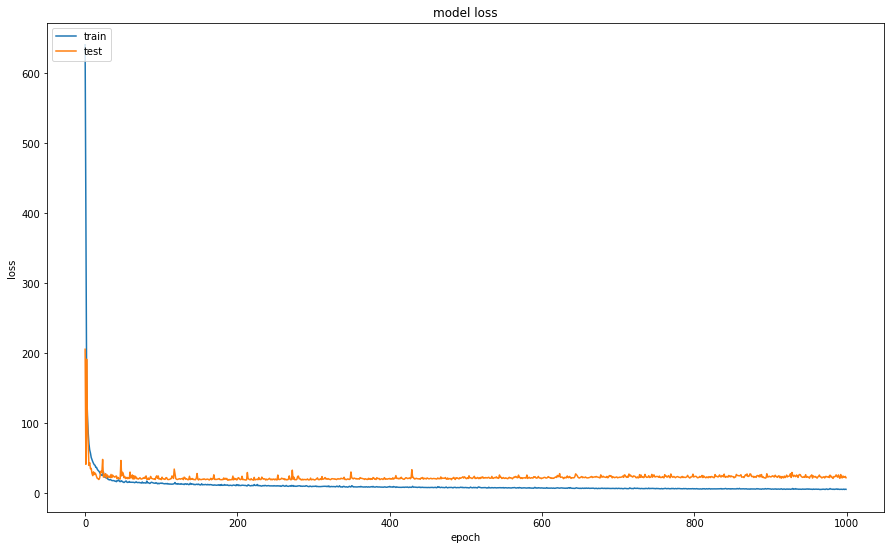

In [121]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

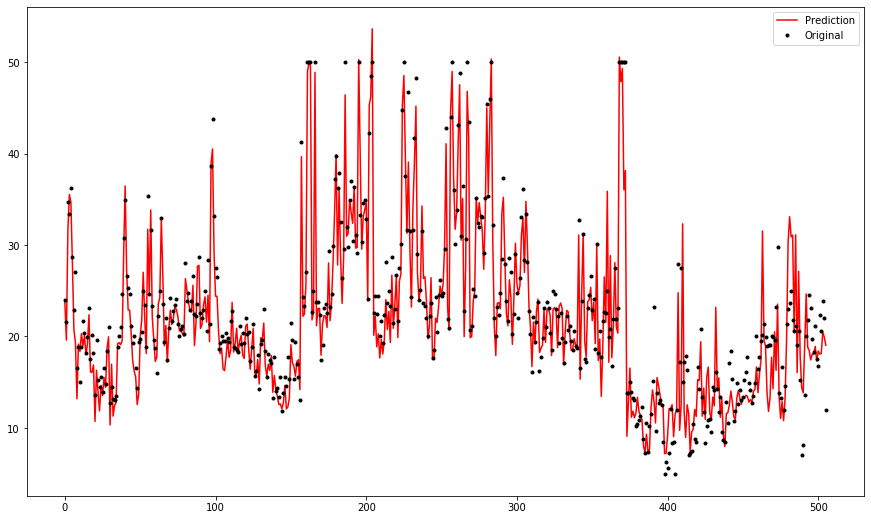

In [122]:
plt.plot(p, 'r-', label='Prediction')
plt.plot(outputs, 'k.', label='Original')
plt.legend()

### Pre processing & Whitening

Pre processing is a technique where the data input is standardised to fit a normally distibuted dataset i.e. Gaussian with zero mean and unit variance. The learning estimators used in scikit-learn may not return the most accurate results if the data doesn't fit this distribution.[2]

Whitening is a method to remove the correlation between variables that can sometimes be useful in predictions in neural networks.

In [123]:
inputsscale = pd.DataFrame(pre.scale(inputs), columns=inputs.columns)
inputsscale

,PTRATIO,ZN,LSTAT,INDUS,RAD,RM
0,-1.459000,0.284830,-1.075562,-1.287909,-0.982843,0.413672
1,-0.303094,-0.487722,-0.492439,-0.593381,-0.867883,0.194274
2,-0.303094,-0.487722,-1.208727,-0.593381,-0.867883,1.282714
3,0.113032,-0.487722,-1.361517,-1.306878,-0.752922,1.016303
4,0.113032,-0.487722,-1.026501,-1.306878,-0.752922,1.228577
5,0.113032,-0.487722,-1.043322,-1.306878,-0.752922,0.207096
6,-1.505237,0.048772,-0.031268,-0.476654,-0.523001,-0.388411
7,-1.505237,0.048772,0.910700,-0.476654,-0.523001,-0.160466
8,-1.505237,0.048772,2.421774,-0.476654,-0.523001,-0.931206
9,-1.505237,0.048772,0.623344,-0.476654,-0.523001,-0.399808


In [124]:
pca = dec.PCA(n_components=6, whiten=True)
pca.fit(inputsscale)
inputsscale_white = pd.DataFrame(pca.transform(inputsscale), columns=inputsscale.columns)

In [125]:
# Train the neural network.
history2 = model.fit(inputsscale_white, outputs, validation_split=.2, epochs=1000, batch_size=30)

Train on 404 samples, validate on 102 samples
Epoch 1/1000
404/404 [==============================] - 0s 39us/step - loss: 300.6840 - accuracy: 0.0000e+00 - mae: 14.2483 - val_loss: 29.6442 - val_accuracy: 0.0000e+00 - val_mae: 3.9548
Epoch 2/1000
404/404 [==============================] - 0s 37us/step - loss: 91.1080 - accuracy: 0.0025 - mae: 7.2583 - val_loss: 32.4466 - val_accuracy: 0.0000e+00 - val_mae: 4.4220
Epoch 3/1000
404/404 [==============================] - 0s 39us/step - loss: 48.1769 - accuracy: 0.0050 - mae: 5.2642 - val_loss: 38.0286 - val_accuracy: 0.0000e+00 - val_mae: 5.0201
Epoch 4/1000
404/404 [==============================] - 0s 37us/step - loss: 33.1916 - accuracy: 0.0050 - mae: 4.4053 - val_loss: 25.4794 - val_accuracy: 0.0196 - val_mae: 4.0400
Epoch 5/1000
404/404 [==============================] - 0s 35us/step - loss: 27.6662 - accuracy: 0.0099 - mae: 3.9540 - val_loss: 25.4139 - val_accuracy: 0.0098 - val_mae: 4.0628
Epoch 6/1000
404/404 [===================

Epoch 46/1000
404/404 [==============================] - 0s 37us/step - loss: 9.0189 - accuracy: 0.0272 - mae: 2.1451 - val_loss: 29.3896 - val_accuracy: 0.0000e+00 - val_mae: 4.0073
Epoch 47/1000
404/404 [==============================] - 0s 35us/step - loss: 8.8253 - accuracy: 0.0297 - mae: 2.1088 - val_loss: 29.7492 - val_accuracy: 0.0000e+00 - val_mae: 4.0326
Epoch 48/1000
404/404 [==============================] - 0s 32us/step - loss: 8.9122 - accuracy: 0.0198 - mae: 2.1195 - val_loss: 29.7400 - val_accuracy: 0.0000e+00 - val_mae: 4.0188
Epoch 49/1000
404/404 [==============================] - 0s 39us/step - loss: 8.8220 - accuracy: 0.0322 - mae: 2.1176 - val_loss: 29.7329 - val_accuracy: 0.0000e+00 - val_mae: 4.0192
Epoch 50/1000
404/404 [==============================] - 0s 35us/step - loss: 8.7010 - accuracy: 0.0371 - mae: 2.0795 - val_loss: 28.7741 - val_accuracy: 0.0000e+00 - val_mae: 3.9439
Epoch 51/1000
404/404 [==============================] - 0s 32us/step - loss: 8.8153 

Epoch 91/1000
404/404 [==============================] - 0s 37us/step - loss: 7.4942 - accuracy: 0.0322 - mae: 1.9115 - val_loss: 27.4673 - val_accuracy: 0.0000e+00 - val_mae: 3.7892
Epoch 92/1000
404/404 [==============================] - 0s 37us/step - loss: 7.3684 - accuracy: 0.0322 - mae: 1.8872 - val_loss: 27.2771 - val_accuracy: 0.0000e+00 - val_mae: 3.8110
Epoch 93/1000
404/404 [==============================] - 0s 35us/step - loss: 7.3825 - accuracy: 0.0272 - mae: 1.9090 - val_loss: 27.4377 - val_accuracy: 0.0000e+00 - val_mae: 3.8078
Epoch 94/1000
404/404 [==============================] - 0s 35us/step - loss: 7.3571 - accuracy: 0.0297 - mae: 1.9041 - val_loss: 27.9305 - val_accuracy: 0.0000e+00 - val_mae: 3.8262
Epoch 95/1000
404/404 [==============================] - 0s 35us/step - loss: 7.3035 - accuracy: 0.0347 - mae: 1.8889 - val_loss: 26.7650 - val_accuracy: 0.0000e+00 - val_mae: 3.7761
Epoch 96/1000
404/404 [==============================] - 0s 35us/step - loss: 7.3493 

Epoch 136/1000
404/404 [==============================] - 0s 32us/step - loss: 6.6833 - accuracy: 0.0347 - mae: 1.7864 - val_loss: 26.8774 - val_accuracy: 0.0000e+00 - val_mae: 3.7337
Epoch 137/1000
404/404 [==============================] - 0s 32us/step - loss: 6.9083 - accuracy: 0.0347 - mae: 1.8183 - val_loss: 26.3519 - val_accuracy: 0.0000e+00 - val_mae: 3.7560
Epoch 138/1000
404/404 [==============================] - 0s 32us/step - loss: 6.6987 - accuracy: 0.0322 - mae: 1.7726 - val_loss: 27.0222 - val_accuracy: 0.0098 - val_mae: 3.7541
Epoch 139/1000
404/404 [==============================] - 0s 30us/step - loss: 6.6878 - accuracy: 0.0322 - mae: 1.7847 - val_loss: 26.7901 - val_accuracy: 0.0098 - val_mae: 3.7141
Epoch 140/1000
404/404 [==============================] - 0s 32us/step - loss: 6.6021 - accuracy: 0.0396 - mae: 1.7798 - val_loss: 26.8744 - val_accuracy: 0.0098 - val_mae: 3.7245
Epoch 141/1000
404/404 [==============================] - 0s 30us/step - loss: 6.6126 - accu

404/404 [==============================] - 0s 42us/step - loss: 6.2079 - accuracy: 0.0248 - mae: 1.7134 - val_loss: 25.9639 - val_accuracy: 0.0098 - val_mae: 3.7423
Epoch 182/1000
404/404 [==============================] - 0s 39us/step - loss: 6.3862 - accuracy: 0.0272 - mae: 1.7306 - val_loss: 26.6019 - val_accuracy: 0.0098 - val_mae: 3.7603
Epoch 183/1000
404/404 [==============================] - 0s 37us/step - loss: 6.2521 - accuracy: 0.0297 - mae: 1.6968 - val_loss: 26.5822 - val_accuracy: 0.0098 - val_mae: 3.7404
Epoch 184/1000
404/404 [==============================] - 0s 37us/step - loss: 6.2249 - accuracy: 0.0371 - mae: 1.6951 - val_loss: 25.9508 - val_accuracy: 0.0098 - val_mae: 3.7251
Epoch 185/1000
404/404 [==============================] - 0s 32us/step - loss: 6.2055 - accuracy: 0.0396 - mae: 1.6984 - val_loss: 25.8440 - val_accuracy: 0.0098 - val_mae: 3.7190
Epoch 186/1000
404/404 [==============================] - 0s 32us/step - loss: 6.1148 - accuracy: 0.0297 - mae: 1.6

404/404 [==============================] - 0s 32us/step - loss: 5.6444 - accuracy: 0.0347 - mae: 1.6179 - val_loss: 26.9031 - val_accuracy: 0.0098 - val_mae: 3.7653
Epoch 227/1000
404/404 [==============================] - 0s 32us/step - loss: 5.6051 - accuracy: 0.0396 - mae: 1.6218 - val_loss: 26.2516 - val_accuracy: 0.0098 - val_mae: 3.7596
Epoch 228/1000
404/404 [==============================] - 0s 30us/step - loss: 5.7286 - accuracy: 0.0495 - mae: 1.6362 - val_loss: 28.6844 - val_accuracy: 0.0000e+00 - val_mae: 3.8422
Epoch 229/1000
404/404 [==============================] - 0s 30us/step - loss: 5.6836 - accuracy: 0.0470 - mae: 1.6268 - val_loss: 26.2918 - val_accuracy: 0.0098 - val_mae: 3.7395
Epoch 230/1000
404/404 [==============================] - 0s 32us/step - loss: 5.7810 - accuracy: 0.0347 - mae: 1.6409 - val_loss: 26.6127 - val_accuracy: 0.0098 - val_mae: 3.7847
Epoch 231/1000
404/404 [==============================] - 0s 32us/step - loss: 5.6783 - accuracy: 0.0470 - mae:

404/404 [==============================] - 0s 52us/step - loss: 5.3693 - accuracy: 0.0371 - mae: 1.5881 - val_loss: 28.2469 - val_accuracy: 0.0000e+00 - val_mae: 3.8460
Epoch 272/1000
404/404 [==============================] - 0s 37us/step - loss: 5.3773 - accuracy: 0.0371 - mae: 1.5897 - val_loss: 26.7190 - val_accuracy: 0.0000e+00 - val_mae: 3.8162
Epoch 273/1000
404/404 [==============================] - 0s 37us/step - loss: 5.2070 - accuracy: 0.0421 - mae: 1.5469 - val_loss: 27.3129 - val_accuracy: 0.0000e+00 - val_mae: 3.8339
Epoch 274/1000
404/404 [==============================] - 0s 37us/step - loss: 5.2057 - accuracy: 0.0421 - mae: 1.5364 - val_loss: 25.7425 - val_accuracy: 0.0000e+00 - val_mae: 3.8077
Epoch 275/1000
404/404 [==============================] - 0s 42us/step - loss: 5.1812 - accuracy: 0.0421 - mae: 1.5449 - val_loss: 26.2483 - val_accuracy: 0.0098 - val_mae: 3.8352
Epoch 276/1000
404/404 [==============================] - 0s 39us/step - loss: 5.2151 - accuracy: 0

404/404 [==============================] - 0s 30us/step - loss: 4.8507 - accuracy: 0.0371 - mae: 1.4967 - val_loss: 27.3778 - val_accuracy: 0.0000e+00 - val_mae: 3.8819
Epoch 316/1000
404/404 [==============================] - 0s 30us/step - loss: 4.8466 - accuracy: 0.0396 - mae: 1.5088 - val_loss: 27.1627 - val_accuracy: 0.0000e+00 - val_mae: 3.8456
Epoch 317/1000
404/404 [==============================] - 0s 30us/step - loss: 4.9183 - accuracy: 0.0545 - mae: 1.4980 - val_loss: 27.3784 - val_accuracy: 0.0000e+00 - val_mae: 3.8826
Epoch 318/1000
404/404 [==============================] - 0s 32us/step - loss: 4.8004 - accuracy: 0.0396 - mae: 1.4829 - val_loss: 25.6819 - val_accuracy: 0.0000e+00 - val_mae: 3.8013
Epoch 319/1000
404/404 [==============================] - 0s 32us/step - loss: 5.0025 - accuracy: 0.0421 - mae: 1.5170 - val_loss: 26.8738 - val_accuracy: 0.0000e+00 - val_mae: 3.8735
Epoch 320/1000
404/404 [==============================] - 0s 32us/step - loss: 4.7208 - accurac

Epoch 360/1000
404/404 [==============================] - 0s 30us/step - loss: 4.4723 - accuracy: 0.0371 - mae: 1.4358 - val_loss: 27.9538 - val_accuracy: 0.0000e+00 - val_mae: 3.9709
Epoch 361/1000
404/404 [==============================] - 0s 37us/step - loss: 4.4774 - accuracy: 0.0520 - mae: 1.4222 - val_loss: 26.2935 - val_accuracy: 0.0000e+00 - val_mae: 3.8612
Epoch 362/1000
404/404 [==============================] - 0s 37us/step - loss: 4.7356 - accuracy: 0.0396 - mae: 1.4775 - val_loss: 28.6049 - val_accuracy: 0.0098 - val_mae: 3.9259
Epoch 363/1000
404/404 [==============================] - 0s 37us/step - loss: 4.6595 - accuracy: 0.0446 - mae: 1.4593 - val_loss: 26.6624 - val_accuracy: 0.0098 - val_mae: 3.8823
Epoch 364/1000
404/404 [==============================] - 0s 32us/step - loss: 4.4253 - accuracy: 0.0297 - mae: 1.4121 - val_loss: 26.3007 - val_accuracy: 0.0000e+00 - val_mae: 3.8632
Epoch 365/1000
404/404 [==============================] - 0s 37us/step - loss: 4.3933 - 

404/404 [==============================] - 0s 35us/step - loss: 4.4721 - accuracy: 0.0322 - mae: 1.4256 - val_loss: 30.0405 - val_accuracy: 0.0098 - val_mae: 4.0286
Epoch 406/1000
404/404 [==============================] - 0s 35us/step - loss: 4.3426 - accuracy: 0.0297 - mae: 1.4002 - val_loss: 27.7775 - val_accuracy: 0.0098 - val_mae: 3.9684
Epoch 407/1000
404/404 [==============================] - 0s 35us/step - loss: 4.2045 - accuracy: 0.0371 - mae: 1.3840 - val_loss: 30.3170 - val_accuracy: 0.0000e+00 - val_mae: 4.0799
Epoch 408/1000
404/404 [==============================] - 0s 37us/step - loss: 4.2829 - accuracy: 0.0396 - mae: 1.4006 - val_loss: 28.3212 - val_accuracy: 0.0098 - val_mae: 4.0045
Epoch 409/1000
404/404 [==============================] - 0s 35us/step - loss: 4.1603 - accuracy: 0.0322 - mae: 1.4026 - val_loss: 28.5925 - val_accuracy: 0.0098 - val_mae: 3.9768
Epoch 410/1000
404/404 [==============================] - 0s 35us/step - loss: 4.1712 - accuracy: 0.0371 - mae:

404/404 [==============================] - 0s 32us/step - loss: 4.1291 - accuracy: 0.0495 - mae: 1.3719 - val_loss: 28.3076 - val_accuracy: 0.0098 - val_mae: 4.0069
Epoch 451/1000
404/404 [==============================] - 0s 32us/step - loss: 3.9299 - accuracy: 0.0371 - mae: 1.3453 - val_loss: 27.6610 - val_accuracy: 0.0098 - val_mae: 3.9845
Epoch 452/1000
404/404 [==============================] - 0s 30us/step - loss: 3.9274 - accuracy: 0.0446 - mae: 1.3328 - val_loss: 28.5543 - val_accuracy: 0.0098 - val_mae: 4.0503
Epoch 453/1000
404/404 [==============================] - 0s 27us/step - loss: 3.8794 - accuracy: 0.0396 - mae: 1.3064 - val_loss: 27.8014 - val_accuracy: 0.0098 - val_mae: 4.0046
Epoch 454/1000
404/404 [==============================] - 0s 30us/step - loss: 3.9010 - accuracy: 0.0322 - mae: 1.3302 - val_loss: 27.6218 - val_accuracy: 0.0098 - val_mae: 3.9951
Epoch 455/1000
404/404 [==============================] - 0s 30us/step - loss: 3.9584 - accuracy: 0.0421 - mae: 1.3

Epoch 495/1000
404/404 [==============================] - 0s 35us/step - loss: 3.6716 - accuracy: 0.0371 - mae: 1.2860 - val_loss: 28.2130 - val_accuracy: 0.0098 - val_mae: 4.0621
Epoch 496/1000
404/404 [==============================] - 0s 39us/step - loss: 3.7722 - accuracy: 0.0470 - mae: 1.2856 - val_loss: 32.1010 - val_accuracy: 0.0098 - val_mae: 4.1827
Epoch 497/1000
404/404 [==============================] - 0s 35us/step - loss: 3.8856 - accuracy: 0.0470 - mae: 1.2959 - val_loss: 28.4170 - val_accuracy: 0.0098 - val_mae: 4.0651
Epoch 498/1000
404/404 [==============================] - 0s 32us/step - loss: 3.7629 - accuracy: 0.0347 - mae: 1.3253 - val_loss: 28.6841 - val_accuracy: 0.0098 - val_mae: 4.0906
Epoch 499/1000
404/404 [==============================] - 0s 30us/step - loss: 3.7259 - accuracy: 0.0520 - mae: 1.2829 - val_loss: 28.3449 - val_accuracy: 0.0098 - val_mae: 4.0532
Epoch 500/1000
404/404 [==============================] - 0s 32us/step - loss: 3.7969 - accuracy: 0.

404/404 [==============================] - 0s 32us/step - loss: 3.7857 - accuracy: 0.0371 - mae: 1.2960 - val_loss: 27.1730 - val_accuracy: 0.0098 - val_mae: 4.0468
Epoch 541/1000
404/404 [==============================] - 0s 30us/step - loss: 3.9019 - accuracy: 0.0421 - mae: 1.3218 - val_loss: 29.8776 - val_accuracy: 0.0098 - val_mae: 4.1330
Epoch 542/1000
404/404 [==============================] - 0s 32us/step - loss: 3.6923 - accuracy: 0.0322 - mae: 1.2721 - val_loss: 29.0181 - val_accuracy: 0.0098 - val_mae: 4.1352
Epoch 543/1000
404/404 [==============================] - 0s 32us/step - loss: 3.6294 - accuracy: 0.0347 - mae: 1.2649 - val_loss: 29.5959 - val_accuracy: 0.0098 - val_mae: 4.1227
Epoch 544/1000
404/404 [==============================] - 0s 30us/step - loss: 3.5968 - accuracy: 0.0347 - mae: 1.2471 - val_loss: 28.8623 - val_accuracy: 0.0098 - val_mae: 4.1164
Epoch 545/1000
404/404 [==============================] - 0s 32us/step - loss: 3.6728 - accuracy: 0.0495 - mae: 1.2

404/404 [==============================] - 0s 37us/step - loss: 3.6015 - accuracy: 0.0495 - mae: 1.2405 - val_loss: 30.4120 - val_accuracy: 0.0098 - val_mae: 4.1870
Epoch 586/1000
404/404 [==============================] - 0s 32us/step - loss: 3.4860 - accuracy: 0.0371 - mae: 1.2479 - val_loss: 29.9039 - val_accuracy: 0.0098 - val_mae: 4.1507
Epoch 587/1000
404/404 [==============================] - 0s 32us/step - loss: 3.5563 - accuracy: 0.0446 - mae: 1.2279 - val_loss: 28.4891 - val_accuracy: 0.0098 - val_mae: 4.1139
Epoch 588/1000
404/404 [==============================] - 0s 37us/step - loss: 3.5886 - accuracy: 0.0371 - mae: 1.2572 - val_loss: 31.2119 - val_accuracy: 0.0000e+00 - val_mae: 4.2182
Epoch 589/1000
404/404 [==============================] - 0s 44us/step - loss: 3.4976 - accuracy: 0.0396 - mae: 1.2520 - val_loss: 29.5916 - val_accuracy: 0.0098 - val_mae: 4.1367
Epoch 590/1000
404/404 [==============================] - 0s 35us/step - loss: 3.5527 - accuracy: 0.0322 - mae:

404/404 [==============================] - 0s 30us/step - loss: 3.4159 - accuracy: 0.0446 - mae: 1.1991 - val_loss: 29.4615 - val_accuracy: 0.0098 - val_mae: 4.1378
Epoch 631/1000
404/404 [==============================] - 0s 32us/step - loss: 3.3539 - accuracy: 0.0371 - mae: 1.1970 - val_loss: 29.1484 - val_accuracy: 0.0098 - val_mae: 4.1217
Epoch 632/1000
404/404 [==============================] - 0s 30us/step - loss: 3.5229 - accuracy: 0.0396 - mae: 1.2215 - val_loss: 28.5954 - val_accuracy: 0.0000e+00 - val_mae: 4.1263
Epoch 633/1000
404/404 [==============================] - 0s 32us/step - loss: 3.5468 - accuracy: 0.0396 - mae: 1.2301 - val_loss: 28.9846 - val_accuracy: 0.0000e+00 - val_mae: 4.1231
Epoch 634/1000
404/404 [==============================] - 0s 32us/step - loss: 3.5843 - accuracy: 0.0421 - mae: 1.2518 - val_loss: 29.6180 - val_accuracy: 0.0098 - val_mae: 4.1425
Epoch 635/1000
404/404 [==============================] - 0s 32us/step - loss: 3.5099 - accuracy: 0.0446 - 

404/404 [==============================] - 0s 39us/step - loss: 3.2419 - accuracy: 0.0421 - mae: 1.1836 - val_loss: 30.4442 - val_accuracy: 0.0098 - val_mae: 4.2073
Epoch 676/1000
404/404 [==============================] - 0s 39us/step - loss: 3.2061 - accuracy: 0.0421 - mae: 1.1693 - val_loss: 29.4892 - val_accuracy: 0.0098 - val_mae: 4.1717
Epoch 677/1000
404/404 [==============================] - 0s 32us/step - loss: 3.2325 - accuracy: 0.0545 - mae: 1.1765 - val_loss: 30.6809 - val_accuracy: 0.0098 - val_mae: 4.2347
Epoch 678/1000
404/404 [==============================] - 0s 35us/step - loss: 3.2495 - accuracy: 0.0446 - mae: 1.1725 - val_loss: 30.2398 - val_accuracy: 0.0098 - val_mae: 4.1965
Epoch 679/1000
404/404 [==============================] - 0s 35us/step - loss: 3.3285 - accuracy: 0.0446 - mae: 1.1828 - val_loss: 28.9477 - val_accuracy: 0.0098 - val_mae: 4.1688
Epoch 680/1000
404/404 [==============================] - 0s 32us/step - loss: 3.3016 - accuracy: 0.0594 - mae: 1.1

404/404 [==============================] - 0s 40us/step - loss: 3.2528 - accuracy: 0.0470 - mae: 1.1933 - val_loss: 28.7700 - val_accuracy: 0.0098 - val_mae: 4.1512
Epoch 721/1000
404/404 [==============================] - 0s 37us/step - loss: 3.0993 - accuracy: 0.0446 - mae: 1.1438 - val_loss: 32.2751 - val_accuracy: 0.0098 - val_mae: 4.3172
Epoch 722/1000
404/404 [==============================] - 0s 32us/step - loss: 3.3013 - accuracy: 0.0520 - mae: 1.1739 - val_loss: 28.9314 - val_accuracy: 0.0098 - val_mae: 4.1558
Epoch 723/1000
404/404 [==============================] - 0s 32us/step - loss: 3.3024 - accuracy: 0.0495 - mae: 1.1554 - val_loss: 30.6099 - val_accuracy: 0.0098 - val_mae: 4.2350
Epoch 724/1000
404/404 [==============================] - 0s 32us/step - loss: 3.2335 - accuracy: 0.0470 - mae: 1.1768 - val_loss: 29.4613 - val_accuracy: 0.0000e+00 - val_mae: 4.1701
Epoch 725/1000
404/404 [==============================] - 0s 37us/step - loss: 3.1464 - accuracy: 0.0520 - mae:

404/404 [==============================] - 0s 35us/step - loss: 3.2813 - accuracy: 0.0470 - mae: 1.1852 - val_loss: 30.1373 - val_accuracy: 0.0098 - val_mae: 4.2252
Epoch 766/1000
404/404 [==============================] - 0s 37us/step - loss: 3.0590 - accuracy: 0.0619 - mae: 1.1198 - val_loss: 30.2815 - val_accuracy: 0.0098 - val_mae: 4.2313
Epoch 767/1000
404/404 [==============================] - 0s 32us/step - loss: 2.9721 - accuracy: 0.0594 - mae: 1.0969 - val_loss: 28.9605 - val_accuracy: 0.0000e+00 - val_mae: 4.1648
Epoch 768/1000
404/404 [==============================] - 0s 37us/step - loss: 3.1102 - accuracy: 0.0569 - mae: 1.1243 - val_loss: 29.2107 - val_accuracy: 0.0000e+00 - val_mae: 4.1957
Epoch 769/1000
404/404 [==============================] - 0s 30us/step - loss: 3.0246 - accuracy: 0.0470 - mae: 1.1437 - val_loss: 30.1051 - val_accuracy: 0.0098 - val_mae: 4.2173
Epoch 770/1000
404/404 [==============================] - 0s 32us/step - loss: 3.0659 - accuracy: 0.0644 - 

404/404 [==============================] - 0s 35us/step - loss: 3.0616 - accuracy: 0.0421 - mae: 1.1139 - val_loss: 30.6150 - val_accuracy: 0.0098 - val_mae: 4.2665
Epoch 811/1000
404/404 [==============================] - 0s 32us/step - loss: 3.0505 - accuracy: 0.0520 - mae: 1.1334 - val_loss: 31.3465 - val_accuracy: 0.0098 - val_mae: 4.2420
Epoch 812/1000
404/404 [==============================] - 0s 37us/step - loss: 3.0944 - accuracy: 0.0396 - mae: 1.1447 - val_loss: 29.6290 - val_accuracy: 0.0000e+00 - val_mae: 4.2684
Epoch 813/1000
404/404 [==============================] - 0s 42us/step - loss: 2.9961 - accuracy: 0.0495 - mae: 1.1112 - val_loss: 32.3806 - val_accuracy: 0.0098 - val_mae: 4.2998
Epoch 814/1000
404/404 [==============================] - 0s 42us/step - loss: 3.0493 - accuracy: 0.0520 - mae: 1.1238 - val_loss: 30.6586 - val_accuracy: 0.0098 - val_mae: 4.2615
Epoch 815/1000
404/404 [==============================] - 0s 35us/step - loss: 3.1218 - accuracy: 0.0619 - mae:

404/404 [==============================] - 0s 32us/step - loss: 2.9281 - accuracy: 0.0619 - mae: 1.0846 - val_loss: 29.3902 - val_accuracy: 0.0098 - val_mae: 4.2014
Epoch 856/1000
404/404 [==============================] - 0s 30us/step - loss: 3.0474 - accuracy: 0.0569 - mae: 1.1314 - val_loss: 30.1024 - val_accuracy: 0.0098 - val_mae: 4.2441
Epoch 857/1000
404/404 [==============================] - 0s 32us/step - loss: 3.1690 - accuracy: 0.0396 - mae: 1.2062 - val_loss: 31.2983 - val_accuracy: 0.0098 - val_mae: 4.2890
Epoch 858/1000
404/404 [==============================] - 0s 30us/step - loss: 3.0908 - accuracy: 0.0569 - mae: 1.1361 - val_loss: 29.2366 - val_accuracy: 0.0098 - val_mae: 4.2059
Epoch 859/1000
404/404 [==============================] - 0s 30us/step - loss: 3.1009 - accuracy: 0.0520 - mae: 1.1513 - val_loss: 32.0482 - val_accuracy: 0.0098 - val_mae: 4.3041
Epoch 860/1000
404/404 [==============================] - 0s 32us/step - loss: 2.9148 - accuracy: 0.0545 - mae: 1.1

404/404 [==============================] - 0s 32us/step - loss: 2.8662 - accuracy: 0.0520 - mae: 1.1171 - val_loss: 32.3422 - val_accuracy: 0.0098 - val_mae: 4.3560
Epoch 901/1000
404/404 [==============================] - 0s 35us/step - loss: 2.8148 - accuracy: 0.0594 - mae: 1.0974 - val_loss: 31.1638 - val_accuracy: 0.0098 - val_mae: 4.3282
Epoch 902/1000
404/404 [==============================] - 0s 32us/step - loss: 2.9761 - accuracy: 0.0495 - mae: 1.1090 - val_loss: 31.3762 - val_accuracy: 0.0098 - val_mae: 4.3229
Epoch 903/1000
404/404 [==============================] - 0s 32us/step - loss: 2.9262 - accuracy: 0.0619 - mae: 1.1198 - val_loss: 30.3415 - val_accuracy: 0.0098 - val_mae: 4.2937
Epoch 904/1000
404/404 [==============================] - 0s 35us/step - loss: 3.0057 - accuracy: 0.0569 - mae: 1.1375 - val_loss: 30.2629 - val_accuracy: 0.0098 - val_mae: 4.2693
Epoch 905/1000
404/404 [==============================] - 0s 44us/step - loss: 2.7903 - accuracy: 0.0619 - mae: 1.0

404/404 [==============================] - 0s 32us/step - loss: 2.8477 - accuracy: 0.0545 - mae: 1.0800 - val_loss: 29.7754 - val_accuracy: 0.0098 - val_mae: 4.2451
Epoch 946/1000
404/404 [==============================] - 0s 32us/step - loss: 2.8217 - accuracy: 0.0495 - mae: 1.0647 - val_loss: 29.6654 - val_accuracy: 0.0098 - val_mae: 4.2727
Epoch 947/1000
404/404 [==============================] - 0s 32us/step - loss: 3.2067 - accuracy: 0.0594 - mae: 1.1737 - val_loss: 33.4372 - val_accuracy: 0.0098 - val_mae: 4.3814
Epoch 948/1000
404/404 [==============================] - 0s 32us/step - loss: 2.9411 - accuracy: 0.0668 - mae: 1.1171 - val_loss: 30.5906 - val_accuracy: 0.0098 - val_mae: 4.2780
Epoch 949/1000
404/404 [==============================] - 0s 32us/step - loss: 2.9420 - accuracy: 0.0569 - mae: 1.1051 - val_loss: 33.2718 - val_accuracy: 0.0000e+00 - val_mae: 4.4492
Epoch 950/1000
404/404 [==============================] - 0s 30us/step - loss: 2.8774 - accuracy: 0.0545 - mae:

404/404 [==============================] - 0s 37us/step - loss: 2.7425 - accuracy: 0.0594 - mae: 1.0707 - val_loss: 32.9086 - val_accuracy: 0.0098 - val_mae: 4.3834
Epoch 991/1000
404/404 [==============================] - 0s 35us/step - loss: 2.7054 - accuracy: 0.0520 - mae: 1.0812 - val_loss: 30.7872 - val_accuracy: 0.0098 - val_mae: 4.3170
Epoch 992/1000
404/404 [==============================] - 0s 32us/step - loss: 2.7468 - accuracy: 0.0594 - mae: 1.0800 - val_loss: 32.8266 - val_accuracy: 0.0098 - val_mae: 4.3776
Epoch 993/1000
404/404 [==============================] - 0s 30us/step - loss: 2.6829 - accuracy: 0.0619 - mae: 1.0668 - val_loss: 31.9949 - val_accuracy: 0.0098 - val_mae: 4.3552
Epoch 994/1000
404/404 [==============================] - 0s 30us/step - loss: 2.6743 - accuracy: 0.0718 - mae: 1.0460 - val_loss: 31.2832 - val_accuracy: 0.0098 - val_mae: 4.3172
Epoch 995/1000
404/404 [==============================] - 0s 37us/step - loss: 2.5852 - accuracy: 0.0718 - mae: 1.0

In [126]:
p2 = model.predict(inputsscale_white)

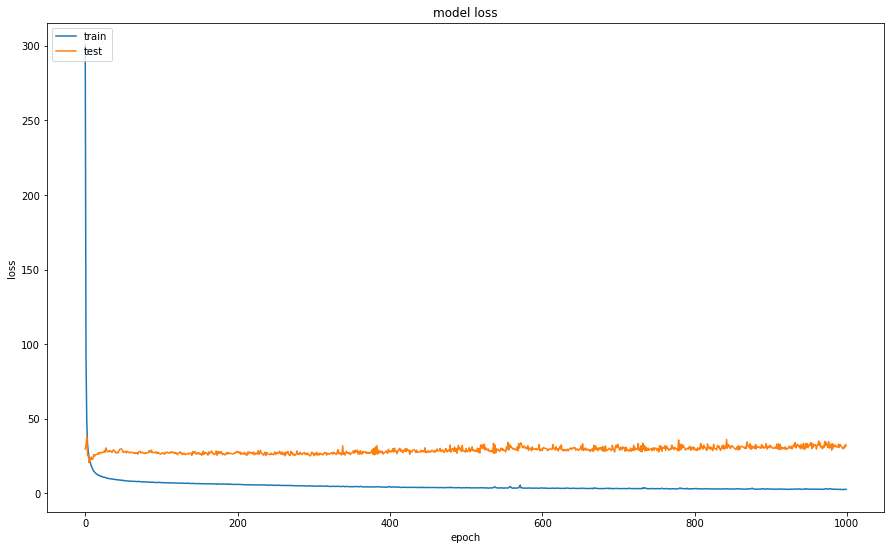

In [127]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

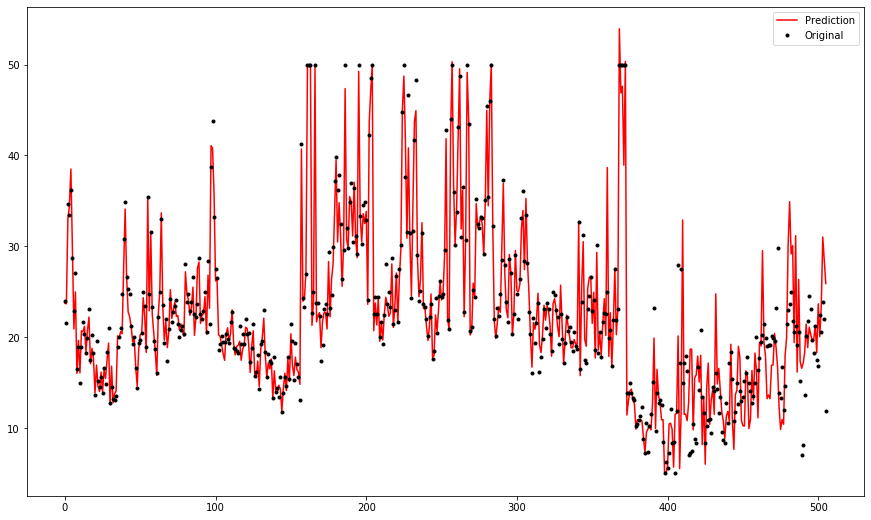

In [128]:
plt.plot(p2, 'r-', label='Prediction')
plt.plot(outputs, 'k.', label='Original')
plt.legend()

### All Inputs

As an experiment, I just want to evaluate the same prediction model and settings using all inputs.

In [129]:
# Start a neural network, building it by layers.
modelall = kr.models.Sequential()

# Add a hidden layer with 64 neurons and an input layer with 13.
modelall.add(kr.layers.Dense(64, input_dim=13, activation='relu'))
modelall.add(kr.layers.Dense(10, activation="softplus"))
modelall.add(kr.layers.Dense(10, activation="relu"))
modelall.add(kr.layers.Dense(1, activation="softplus"))

# Build the graph./ Try loss mean_squared_error as well.
modelall.compile(loss='mean_squared_error', optimizer='nadam', metrics=['accuracy', 'mae'])

In [130]:
history3 = modelall.fit(inputsall, outputs, validation_split=.2, epochs=1000, batch_size=30)

Train on 404 samples, validate on 102 samples
Epoch 1/1000
404/404 [==============================] - 0s 390us/step - loss: 152.6707 - accuracy: 0.0025 - mae: 9.1962 - val_loss: 351.9091 - val_accuracy: 0.0000e+00 - val_mae: 12.7319
Epoch 2/1000
404/404 [==============================] - 0s 39us/step - loss: 75.9755 - accuracy: 0.0050 - mae: 6.2613 - val_loss: 787.0022 - val_accuracy: 0.0000e+00 - val_mae: 24.3481
Epoch 3/1000
404/404 [==============================] - 0s 47us/step - loss: 83.7260 - accuracy: 0.0025 - mae: 6.7385 - val_loss: 406.5598 - val_accuracy: 0.0000e+00 - val_mae: 14.1300
Epoch 4/1000
404/404 [==============================] - 0s 37us/step - loss: 67.6103 - accuracy: 0.0050 - mae: 6.0262 - val_loss: 349.3216 - val_accuracy: 0.0000e+00 - val_mae: 15.3360
Epoch 5/1000
404/404 [==============================] - 0s 35us/step - loss: 64.9446 - accuracy: 0.0074 - mae: 6.0033 - val_loss: 190.5142 - val_accuracy: 0.0000e+00 - val_mae: 10.5052
Epoch 6/1000
404/404 [=====

404/404 [==============================] - 0s 30us/step - loss: 35.6935 - accuracy: 0.0074 - mae: 4.3245 - val_loss: 220.1975 - val_accuracy: 0.0098 - val_mae: 11.9841
Epoch 46/1000
404/404 [==============================] - 0s 32us/step - loss: 33.7695 - accuracy: 0.0124 - mae: 4.2526 - val_loss: 249.9537 - val_accuracy: 0.0000e+00 - val_mae: 13.7004
Epoch 47/1000
404/404 [==============================] - 0s 30us/step - loss: 35.7213 - accuracy: 0.0074 - mae: 4.4665 - val_loss: 120.3236 - val_accuracy: 0.0000e+00 - val_mae: 8.4139
Epoch 48/1000
404/404 [==============================] - 0s 32us/step - loss: 34.6037 - accuracy: 0.0173 - mae: 4.2624 - val_loss: 121.1920 - val_accuracy: 0.0098 - val_mae: 8.4647
Epoch 49/1000
404/404 [==============================] - 0s 35us/step - loss: 33.4751 - accuracy: 0.0025 - mae: 4.3955 - val_loss: 113.3553 - val_accuracy: 0.0098 - val_mae: 8.7340
Epoch 50/1000
404/404 [==============================] - 0s 35us/step - loss: 33.0391 - accuracy: 0

Epoch 90/1000
404/404 [==============================] - 0s 35us/step - loss: 29.2635 - accuracy: 0.0149 - mae: 3.9706 - val_loss: 60.5458 - val_accuracy: 0.0000e+00 - val_mae: 6.4106
Epoch 91/1000
404/404 [==============================] - 0s 37us/step - loss: 23.5888 - accuracy: 0.0074 - mae: 3.5364 - val_loss: 123.0950 - val_accuracy: 0.0000e+00 - val_mae: 9.7208
Epoch 92/1000
404/404 [==============================] - 0s 37us/step - loss: 27.3910 - accuracy: 0.0124 - mae: 3.8273 - val_loss: 73.2615 - val_accuracy: 0.0000e+00 - val_mae: 7.0999
Epoch 93/1000
404/404 [==============================] - 0s 35us/step - loss: 26.4336 - accuracy: 0.0124 - mae: 3.8239 - val_loss: 52.0540 - val_accuracy: 0.0196 - val_mae: 5.9955
Epoch 94/1000
404/404 [==============================] - 0s 32us/step - loss: 25.3953 - accuracy: 0.0099 - mae: 3.6942 - val_loss: 39.1635 - val_accuracy: 0.0000e+00 - val_mae: 5.3455
Epoch 95/1000
404/404 [==============================] - 0s 37us/step - loss: 24.03

Epoch 135/1000
404/404 [==============================] - 0s 39us/step - loss: 17.6842 - accuracy: 0.0050 - mae: 3.0462 - val_loss: 45.4628 - val_accuracy: 0.0000e+00 - val_mae: 5.4428
Epoch 136/1000
404/404 [==============================] - ETA: 0s - loss: 23.0219 - accuracy: 0.0000e+00 - mae: 3.823 - 0s 35us/step - loss: 20.9085 - accuracy: 0.0124 - mae: 3.3684 - val_loss: 87.0426 - val_accuracy: 0.0000e+00 - val_mae: 7.9117
Epoch 137/1000
404/404 [==============================] - 0s 37us/step - loss: 19.4994 - accuracy: 0.0124 - mae: 3.3556 - val_loss: 41.7305 - val_accuracy: 0.0196 - val_mae: 5.1863
Epoch 138/1000
404/404 [==============================] - 0s 42us/step - loss: 16.6807 - accuracy: 0.0198 - mae: 2.9516 - val_loss: 75.9095 - val_accuracy: 0.0196 - val_mae: 6.8239
Epoch 139/1000
404/404 [==============================] - 0s 37us/step - loss: 15.7359 - accuracy: 0.0124 - mae: 2.8477 - val_loss: 55.7053 - val_accuracy: 0.0098 - val_mae: 6.1419
Epoch 140/1000
404/404 [=

404/404 [==============================] - 0s 39us/step - loss: 17.6095 - accuracy: 0.0025 - mae: 3.0288 - val_loss: 46.6451 - val_accuracy: 0.0098 - val_mae: 5.5368
Epoch 180/1000
404/404 [==============================] - 0s 35us/step - loss: 13.6822 - accuracy: 0.0074 - mae: 2.6517 - val_loss: 106.6453 - val_accuracy: 0.0196 - val_mae: 8.5479
Epoch 181/1000
404/404 [==============================] - 0s 39us/step - loss: 17.7540 - accuracy: 0.0099 - mae: 3.0457 - val_loss: 53.0126 - val_accuracy: 0.0098 - val_mae: 5.9562
Epoch 182/1000
404/404 [==============================] - 0s 32us/step - loss: 14.1741 - accuracy: 0.0074 - mae: 2.7061 - val_loss: 45.7513 - val_accuracy: 0.0000e+00 - val_mae: 5.4319
Epoch 183/1000
404/404 [==============================] - 0s 35us/step - loss: 14.4733 - accuracy: 0.0248 - mae: 2.7302 - val_loss: 48.1542 - val_accuracy: 0.0098 - val_mae: 5.6123
Epoch 184/1000
404/404 [==============================] - 0s 35us/step - loss: 16.7654 - accuracy: 0.0198

Epoch 224/1000
404/404 [==============================] - 0s 35us/step - loss: 13.0643 - accuracy: 0.0074 - mae: 2.5650 - val_loss: 74.0667 - val_accuracy: 0.0000e+00 - val_mae: 6.8228
Epoch 225/1000
404/404 [==============================] - 0s 35us/step - loss: 12.0289 - accuracy: 0.0149 - mae: 2.4335 - val_loss: 96.8320 - val_accuracy: 0.0000e+00 - val_mae: 7.8222
Epoch 226/1000
404/404 [==============================] - 0s 37us/step - loss: 12.5620 - accuracy: 0.0149 - mae: 2.4872 - val_loss: 67.6848 - val_accuracy: 0.0196 - val_mae: 6.3393
Epoch 227/1000
404/404 [==============================] - 0s 37us/step - loss: 13.2343 - accuracy: 0.0099 - mae: 2.5429 - val_loss: 49.6521 - val_accuracy: 0.0000e+00 - val_mae: 5.5826
Epoch 228/1000
404/404 [==============================] - 0s 35us/step - loss: 16.4538 - accuracy: 0.0099 - mae: 2.9390 - val_loss: 71.0875 - val_accuracy: 0.0098 - val_mae: 6.7461
Epoch 229/1000
404/404 [==============================] - 0s 32us/step - loss: 13.4

Epoch 269/1000
404/404 [==============================] - 0s 32us/step - loss: 12.7138 - accuracy: 0.0099 - mae: 2.5319 - val_loss: 58.6635 - val_accuracy: 0.0000e+00 - val_mae: 6.2164
Epoch 270/1000
404/404 [==============================] - 0s 30us/step - loss: 12.8294 - accuracy: 0.0198 - mae: 2.5869 - val_loss: 46.0894 - val_accuracy: 0.0294 - val_mae: 5.4059
Epoch 271/1000
404/404 [==============================] - 0s 30us/step - loss: 11.2508 - accuracy: 0.0248 - mae: 2.3833 - val_loss: 36.1773 - val_accuracy: 0.0098 - val_mae: 4.4053
Epoch 272/1000
404/404 [==============================] - 0s 32us/step - loss: 18.7762 - accuracy: 0.0198 - mae: 3.1531 - val_loss: 60.0065 - val_accuracy: 0.0098 - val_mae: 6.1034
Epoch 273/1000
404/404 [==============================] - 0s 32us/step - loss: 10.8919 - accuracy: 0.0149 - mae: 2.3333 - val_loss: 67.8106 - val_accuracy: 0.0098 - val_mae: 6.5038
Epoch 274/1000
404/404 [==============================] - 0s 30us/step - loss: 11.9571 - ac

Epoch 314/1000
404/404 [==============================] - 0s 37us/step - loss: 10.7922 - accuracy: 0.0272 - mae: 2.3057 - val_loss: 47.4099 - val_accuracy: 0.0294 - val_mae: 5.2359
Epoch 315/1000
404/404 [==============================] - 0s 35us/step - loss: 11.7945 - accuracy: 0.0223 - mae: 2.5184 - val_loss: 46.8533 - val_accuracy: 0.0196 - val_mae: 5.1301
Epoch 316/1000
404/404 [==============================] - 0s 32us/step - loss: 10.5012 - accuracy: 0.0248 - mae: 2.3109 - val_loss: 50.6996 - val_accuracy: 0.0196 - val_mae: 5.4487
Epoch 317/1000
404/404 [==============================] - 0s 30us/step - loss: 11.5588 - accuracy: 0.0124 - mae: 2.4650 - val_loss: 52.9210 - val_accuracy: 0.0294 - val_mae: 5.5804
Epoch 318/1000
404/404 [==============================] - 0s 30us/step - loss: 9.4487 - accuracy: 0.0149 - mae: 2.2574 - val_loss: 52.7422 - val_accuracy: 0.0294 - val_mae: 5.5543
Epoch 319/1000
404/404 [==============================] - 0s 30us/step - loss: 9.6056 - accuracy

404/404 [==============================] - 0s 32us/step - loss: 10.6512 - accuracy: 0.0248 - mae: 2.3186 - val_loss: 63.5641 - val_accuracy: 0.0294 - val_mae: 6.0756
Epoch 360/1000
404/404 [==============================] - 0s 30us/step - loss: 9.4637 - accuracy: 0.0223 - mae: 2.1658 - val_loss: 57.4612 - val_accuracy: 0.0196 - val_mae: 5.8380
Epoch 361/1000
404/404 [==============================] - 0s 30us/step - loss: 9.9477 - accuracy: 0.0173 - mae: 2.2518 - val_loss: 68.9220 - val_accuracy: 0.0000e+00 - val_mae: 6.6339
Epoch 362/1000
404/404 [==============================] - 0s 30us/step - loss: 10.2354 - accuracy: 0.0198 - mae: 2.3407 - val_loss: 64.7482 - val_accuracy: 0.0098 - val_mae: 6.1856
Epoch 363/1000
404/404 [==============================] - 0s 32us/step - loss: 10.6599 - accuracy: 0.0149 - mae: 2.3391 - val_loss: 62.9384 - val_accuracy: 0.0000e+00 - val_mae: 6.4219
Epoch 364/1000
404/404 [==============================] - 0s 30us/step - loss: 10.3481 - accuracy: 0.017

Epoch 404/1000
404/404 [==============================] - 0s 39us/step - loss: 8.6641 - accuracy: 0.0198 - mae: 2.0866 - val_loss: 71.7786 - val_accuracy: 0.0196 - val_mae: 6.4871
Epoch 405/1000
404/404 [==============================] - 0s 42us/step - loss: 8.5167 - accuracy: 0.0173 - mae: 2.0714 - val_loss: 61.8604 - val_accuracy: 0.0000e+00 - val_mae: 5.9273
Epoch 406/1000
404/404 [==============================] - 0s 39us/step - loss: 10.8568 - accuracy: 0.0099 - mae: 2.4230 - val_loss: 56.8409 - val_accuracy: 0.0098 - val_mae: 5.5760
Epoch 407/1000
404/404 [==============================] - 0s 44us/step - loss: 9.2715 - accuracy: 0.0173 - mae: 2.1741 - val_loss: 66.0118 - val_accuracy: 0.0196 - val_mae: 6.1396
Epoch 408/1000
404/404 [==============================] - 0s 40us/step - loss: 8.4819 - accuracy: 0.0124 - mae: 2.0405 - val_loss: 72.4580 - val_accuracy: 0.0098 - val_mae: 6.4467
Epoch 409/1000
404/404 [==============================] - 0s 42us/step - loss: 8.6016 - accurac

404/404 [==============================] - 0s 32us/step - loss: 8.3856 - accuracy: 0.0198 - mae: 2.1472 - val_loss: 55.4616 - val_accuracy: 0.0098 - val_mae: 5.6728
Epoch 450/1000
404/404 [==============================] - 0s 32us/step - loss: 7.4897 - accuracy: 0.0173 - mae: 1.9523 - val_loss: 49.9462 - val_accuracy: 0.0294 - val_mae: 5.4394
Epoch 451/1000
404/404 [==============================] - 0s 32us/step - loss: 8.1478 - accuracy: 0.0198 - mae: 2.0556 - val_loss: 59.0893 - val_accuracy: 0.0098 - val_mae: 5.9780
Epoch 452/1000
404/404 [==============================] - 0s 30us/step - loss: 10.2725 - accuracy: 0.0272 - mae: 2.2562 - val_loss: 63.1531 - val_accuracy: 0.0098 - val_mae: 6.2767
Epoch 453/1000
404/404 [==============================] - 0s 32us/step - loss: 11.2238 - accuracy: 0.0149 - mae: 2.5011 - val_loss: 65.2914 - val_accuracy: 0.0196 - val_mae: 6.2864
Epoch 454/1000
404/404 [==============================] - 0s 32us/step - loss: 9.1439 - accuracy: 0.0173 - mae: 2

404/404 [==============================] - 0s 27us/step - loss: 8.9101 - accuracy: 0.0149 - mae: 2.0899 - val_loss: 56.6165 - val_accuracy: 0.0000e+00 - val_mae: 5.9854
Epoch 495/1000
404/404 [==============================] - 0s 35us/step - loss: 8.7988 - accuracy: 0.0223 - mae: 1.9627 - val_loss: 40.2261 - val_accuracy: 0.0098 - val_mae: 5.1577
Epoch 496/1000
404/404 [==============================] - 0s 39us/step - loss: 9.8175 - accuracy: 0.0074 - mae: 2.2372 - val_loss: 43.3550 - val_accuracy: 0.0098 - val_mae: 5.5350
Epoch 497/1000
404/404 [==============================] - 0s 39us/step - loss: 10.7417 - accuracy: 0.0248 - mae: 2.2575 - val_loss: 41.6163 - val_accuracy: 0.0196 - val_mae: 5.3894
Epoch 498/1000
404/404 [==============================] - 0s 37us/step - loss: 10.1738 - accuracy: 0.0173 - mae: 2.2113 - val_loss: 47.0269 - val_accuracy: 0.0196 - val_mae: 5.7823
Epoch 499/1000
404/404 [==============================] - 0s 37us/step - loss: 8.9114 - accuracy: 0.0198 - ma

404/404 [==============================] - 0s 42us/step - loss: 10.6447 - accuracy: 0.0149 - mae: 2.3005 - val_loss: 45.6364 - val_accuracy: 0.0098 - val_mae: 5.5726
Epoch 540/1000
404/404 [==============================] - 0s 42us/step - loss: 7.6314 - accuracy: 0.0198 - mae: 1.9910 - val_loss: 35.7741 - val_accuracy: 0.0098 - val_mae: 5.0129
Epoch 541/1000
404/404 [==============================] - 0s 37us/step - loss: 8.2114 - accuracy: 0.0223 - mae: 1.9811 - val_loss: 36.0175 - val_accuracy: 0.0000e+00 - val_mae: 4.9031
Epoch 542/1000
404/404 [==============================] - 0s 35us/step - loss: 8.6316 - accuracy: 0.0149 - mae: 2.1168 - val_loss: 37.5268 - val_accuracy: 0.0098 - val_mae: 5.1317
Epoch 543/1000
404/404 [==============================] - 0s 32us/step - loss: 7.7068 - accuracy: 0.0198 - mae: 1.9646 - val_loss: 29.2579 - val_accuracy: 0.0000e+00 - val_mae: 4.4758
Epoch 544/1000
404/404 [==============================] - 0s 35us/step - loss: 8.5128 - accuracy: 0.0223 -

Epoch 584/1000
404/404 [==============================] - 0s 37us/step - loss: 7.6774 - accuracy: 0.0198 - mae: 2.0030 - val_loss: 34.6675 - val_accuracy: 0.0196 - val_mae: 4.7835
Epoch 585/1000
404/404 [==============================] - 0s 37us/step - loss: 6.7872 - accuracy: 0.0223 - mae: 1.8325 - val_loss: 32.6201 - val_accuracy: 0.0098 - val_mae: 4.5734
Epoch 586/1000
404/404 [==============================] - 0s 40us/step - loss: 8.2926 - accuracy: 0.0272 - mae: 2.1108 - val_loss: 34.9059 - val_accuracy: 0.0098 - val_mae: 4.8341
Epoch 587/1000
404/404 [==============================] - 0s 37us/step - loss: 8.5732 - accuracy: 0.0173 - mae: 2.0540 - val_loss: 36.8047 - val_accuracy: 0.0098 - val_mae: 5.1393
Epoch 588/1000
404/404 [==============================] - 0s 37us/step - loss: 6.7468 - accuracy: 0.0198 - mae: 1.8936 - val_loss: 60.0402 - val_accuracy: 0.0000e+00 - val_mae: 6.1526
Epoch 589/1000
404/404 [==============================] - 0s 32us/step - loss: 7.2475 - accuracy

404/404 [==============================] - 0s 35us/step - loss: 9.6766 - accuracy: 0.0099 - mae: 2.2572 - val_loss: 43.8686 - val_accuracy: 0.0000e+00 - val_mae: 5.4410
Epoch 630/1000
404/404 [==============================] - 0s 35us/step - loss: 6.8487 - accuracy: 0.0198 - mae: 1.8153 - val_loss: 29.7836 - val_accuracy: 0.0098 - val_mae: 4.3397
Epoch 631/1000
404/404 [==============================] - 0s 32us/step - loss: 6.2527 - accuracy: 0.0272 - mae: 1.7782 - val_loss: 42.3280 - val_accuracy: 0.0098 - val_mae: 5.0934
Epoch 632/1000
404/404 [==============================] - 0s 37us/step - loss: 6.6302 - accuracy: 0.0173 - mae: 1.8815 - val_loss: 40.5878 - val_accuracy: 0.0098 - val_mae: 5.1745
Epoch 633/1000
404/404 [==============================] - 0s 42us/step - loss: 5.9397 - accuracy: 0.0124 - mae: 1.7878 - val_loss: 42.7815 - val_accuracy: 0.0000e+00 - val_mae: 5.4970
Epoch 634/1000
404/404 [==============================] - 0s 39us/step - loss: 8.5390 - accuracy: 0.0248 - 

404/404 [==============================] - 0s 35us/step - loss: 5.5770 - accuracy: 0.0198 - mae: 1.7523 - val_loss: 31.4200 - val_accuracy: 0.0000e+00 - val_mae: 4.4884
Epoch 675/1000
404/404 [==============================] - 0s 30us/step - loss: 5.3838 - accuracy: 0.0173 - mae: 1.6714 - val_loss: 41.4680 - val_accuracy: 0.0000e+00 - val_mae: 5.1536
Epoch 676/1000
404/404 [==============================] - 0s 30us/step - loss: 5.4012 - accuracy: 0.0248 - mae: 1.6917 - val_loss: 40.9415 - val_accuracy: 0.0098 - val_mae: 4.9607
Epoch 677/1000
404/404 [==============================] - 0s 32us/step - loss: 5.4647 - accuracy: 0.0297 - mae: 1.7068 - val_loss: 48.0947 - val_accuracy: 0.0000e+00 - val_mae: 5.4344
Epoch 678/1000
404/404 [==============================] - 0s 30us/step - loss: 6.1381 - accuracy: 0.0272 - mae: 1.7637 - val_loss: 41.2722 - val_accuracy: 0.0000e+00 - val_mae: 4.9806
Epoch 679/1000
404/404 [==============================] - 0s 32us/step - loss: 5.8902 - accuracy: 0

404/404 [==============================] - 0s 37us/step - loss: 6.0725 - accuracy: 0.0272 - mae: 1.7913 - val_loss: 37.9056 - val_accuracy: 0.0098 - val_mae: 4.8782
Epoch 720/1000
404/404 [==============================] - 0s 37us/step - loss: 5.2609 - accuracy: 0.0297 - mae: 1.6719 - val_loss: 35.2247 - val_accuracy: 0.0098 - val_mae: 4.6876
Epoch 721/1000
404/404 [==============================] - 0s 35us/step - loss: 8.0775 - accuracy: 0.0173 - mae: 2.0690 - val_loss: 28.9399 - val_accuracy: 0.0196 - val_mae: 4.0388
Epoch 722/1000
404/404 [==============================] - 0s 30us/step - loss: 7.3969 - accuracy: 0.0272 - mae: 2.0667 - val_loss: 71.6025 - val_accuracy: 0.0196 - val_mae: 6.5839
Epoch 723/1000
404/404 [==============================] - 0s 30us/step - loss: 6.6583 - accuracy: 0.0223 - mae: 1.8545 - val_loss: 50.3288 - val_accuracy: 0.0098 - val_mae: 5.4793
Epoch 724/1000
404/404 [==============================] - 0s 30us/step - loss: 6.0894 - accuracy: 0.0297 - mae: 1.8

404/404 [==============================] - 0s 32us/step - loss: 4.3893 - accuracy: 0.0198 - mae: 1.5975 - val_loss: 44.5691 - val_accuracy: 0.0000e+00 - val_mae: 5.0297
Epoch 765/1000
404/404 [==============================] - 0s 32us/step - loss: 4.4670 - accuracy: 0.0173 - mae: 1.5892 - val_loss: 43.4567 - val_accuracy: 0.0196 - val_mae: 5.1139
Epoch 766/1000
404/404 [==============================] - 0s 32us/step - loss: 6.0943 - accuracy: 0.0272 - mae: 1.8630 - val_loss: 65.5493 - val_accuracy: 0.0196 - val_mae: 6.1592
Epoch 767/1000
404/404 [==============================] - 0s 32us/step - loss: 4.4831 - accuracy: 0.0347 - mae: 1.5728 - val_loss: 41.0300 - val_accuracy: 0.0000e+00 - val_mae: 4.9295
Epoch 768/1000
404/404 [==============================] - 0s 30us/step - loss: 5.1544 - accuracy: 0.0322 - mae: 1.6762 - val_loss: 59.0504 - val_accuracy: 0.0196 - val_mae: 5.8994
Epoch 769/1000
404/404 [==============================] - 0s 35us/step - loss: 4.0801 - accuracy: 0.0223 - 

404/404 [==============================] - 0s 35us/step - loss: 4.4279 - accuracy: 0.0173 - mae: 1.5475 - val_loss: 46.6737 - val_accuracy: 0.0098 - val_mae: 5.3215
Epoch 810/1000
404/404 [==============================] - 0s 35us/step - loss: 4.4760 - accuracy: 0.0223 - mae: 1.5943 - val_loss: 61.1438 - val_accuracy: 0.0000e+00 - val_mae: 6.0271
Epoch 811/1000
404/404 [==============================] - 0s 32us/step - loss: 3.6298 - accuracy: 0.0347 - mae: 1.4135 - val_loss: 56.2185 - val_accuracy: 0.0000e+00 - val_mae: 5.6640
Epoch 812/1000
404/404 [==============================] - 0s 30us/step - loss: 3.6408 - accuracy: 0.0347 - mae: 1.4133 - val_loss: 49.7467 - val_accuracy: 0.0196 - val_mae: 5.3980
Epoch 813/1000
404/404 [==============================] - 0s 32us/step - loss: 3.8895 - accuracy: 0.0322 - mae: 1.4673 - val_loss: 58.3554 - val_accuracy: 0.0000e+00 - val_mae: 5.7930
Epoch 814/1000
404/404 [==============================] - 0s 35us/step - loss: 4.2443 - accuracy: 0.017

Epoch 854/1000
404/404 [==============================] - 0s 37us/step - loss: 3.7981 - accuracy: 0.0223 - mae: 1.4575 - val_loss: 143.6285 - val_accuracy: 0.0000e+00 - val_mae: 8.6888
Epoch 855/1000
404/404 [==============================] - 0s 30us/step - loss: 4.0304 - accuracy: 0.0272 - mae: 1.4662 - val_loss: 130.5929 - val_accuracy: 0.0000e+00 - val_mae: 8.3165
Epoch 856/1000
404/404 [==============================] - 0s 35us/step - loss: 3.7067 - accuracy: 0.0297 - mae: 1.4620 - val_loss: 98.4639 - val_accuracy: 0.0000e+00 - val_mae: 7.3140
Epoch 857/1000
404/404 [==============================] - 0s 37us/step - loss: 3.7952 - accuracy: 0.0322 - mae: 1.4678 - val_loss: 99.3250 - val_accuracy: 0.0000e+00 - val_mae: 7.1698
Epoch 858/1000
404/404 [==============================] - 0s 35us/step - loss: 4.0296 - accuracy: 0.0248 - mae: 1.5584 - val_loss: 131.2831 - val_accuracy: 0.0000e+00 - val_mae: 7.9661
Epoch 859/1000
404/404 [==============================] - 0s 32us/step - loss

Epoch 899/1000
404/404 [==============================] - 0s 35us/step - loss: 3.6915 - accuracy: 0.0223 - mae: 1.4666 - val_loss: 123.1022 - val_accuracy: 0.0098 - val_mae: 7.6988
Epoch 900/1000
404/404 [==============================] - 0s 32us/step - loss: 4.0083 - accuracy: 0.0173 - mae: 1.5489 - val_loss: 116.4603 - val_accuracy: 0.0000e+00 - val_mae: 7.7570
Epoch 901/1000
404/404 [==============================] - 0s 32us/step - loss: 3.3143 - accuracy: 0.0297 - mae: 1.3659 - val_loss: 107.0392 - val_accuracy: 0.0000e+00 - val_mae: 7.2929
Epoch 902/1000
404/404 [==============================] - 0s 30us/step - loss: 3.7902 - accuracy: 0.0297 - mae: 1.5002 - val_loss: 123.0599 - val_accuracy: 0.0098 - val_mae: 7.6877
Epoch 903/1000
404/404 [==============================] - 0s 30us/step - loss: 3.2716 - accuracy: 0.0198 - mae: 1.3775 - val_loss: 123.1720 - val_accuracy: 0.0000e+00 - val_mae: 7.7386
Epoch 904/1000
404/404 [==============================] - 0s 32us/step - loss: 3.43

Epoch 944/1000
404/404 [==============================] - 0s 35us/step - loss: 4.0145 - accuracy: 0.0223 - mae: 1.5634 - val_loss: 108.6761 - val_accuracy: 0.0098 - val_mae: 7.4909
Epoch 945/1000
404/404 [==============================] - 0s 39us/step - loss: 3.3683 - accuracy: 0.0322 - mae: 1.3947 - val_loss: 140.4009 - val_accuracy: 0.0098 - val_mae: 8.4809
Epoch 946/1000
404/404 [==============================] - 0s 42us/step - loss: 3.1152 - accuracy: 0.0371 - mae: 1.3330 - val_loss: 126.4838 - val_accuracy: 0.0000e+00 - val_mae: 8.0407
Epoch 947/1000
404/404 [==============================] - 0s 35us/step - loss: 3.2397 - accuracy: 0.0322 - mae: 1.3468 - val_loss: 106.5691 - val_accuracy: 0.0098 - val_mae: 7.2300
Epoch 948/1000
404/404 [==============================] - 0s 35us/step - loss: 3.2948 - accuracy: 0.0421 - mae: 1.3953 - val_loss: 120.6718 - val_accuracy: 0.0098 - val_mae: 7.7005
Epoch 949/1000
404/404 [==============================] - 0s 35us/step - loss: 3.9407 - acc

Epoch 989/1000
404/404 [==============================] - 0s 30us/step - loss: 4.3110 - accuracy: 0.0347 - mae: 1.5779 - val_loss: 120.8132 - val_accuracy: 0.0196 - val_mae: 7.6752
Epoch 990/1000
404/404 [==============================] - 0s 32us/step - loss: 2.9010 - accuracy: 0.0272 - mae: 1.3160 - val_loss: 145.0960 - val_accuracy: 0.0294 - val_mae: 8.6162
Epoch 991/1000
404/404 [==============================] - 0s 30us/step - loss: 3.2741 - accuracy: 0.0347 - mae: 1.3578 - val_loss: 122.4406 - val_accuracy: 0.0000e+00 - val_mae: 7.8274
Epoch 992/1000
404/404 [==============================] - 0s 32us/step - loss: 4.5104 - accuracy: 0.0297 - mae: 1.7045 - val_loss: 136.4112 - val_accuracy: 0.0196 - val_mae: 8.2615
Epoch 993/1000
404/404 [==============================] - 0s 32us/step - loss: 4.1569 - accuracy: 0.0446 - mae: 1.5493 - val_loss: 121.2228 - val_accuracy: 0.0000e+00 - val_mae: 7.9844
Epoch 994/1000
404/404 [==============================] - 0s 32us/step - loss: 4.3619 -

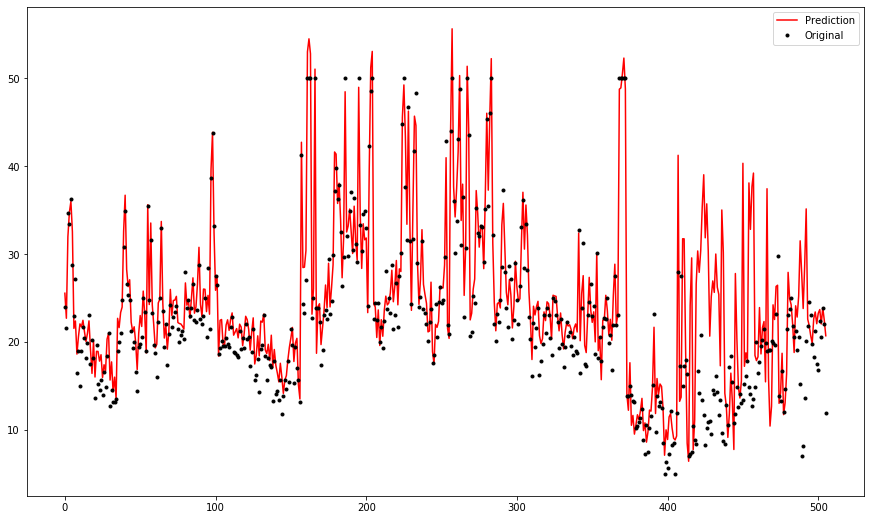

In [131]:
p3 = modelall.predict(inputsall)
plt.plot(p3, 'r-', label='Prediction')
plt.plot(outputs, 'k.', label='Original')
plt.legend()

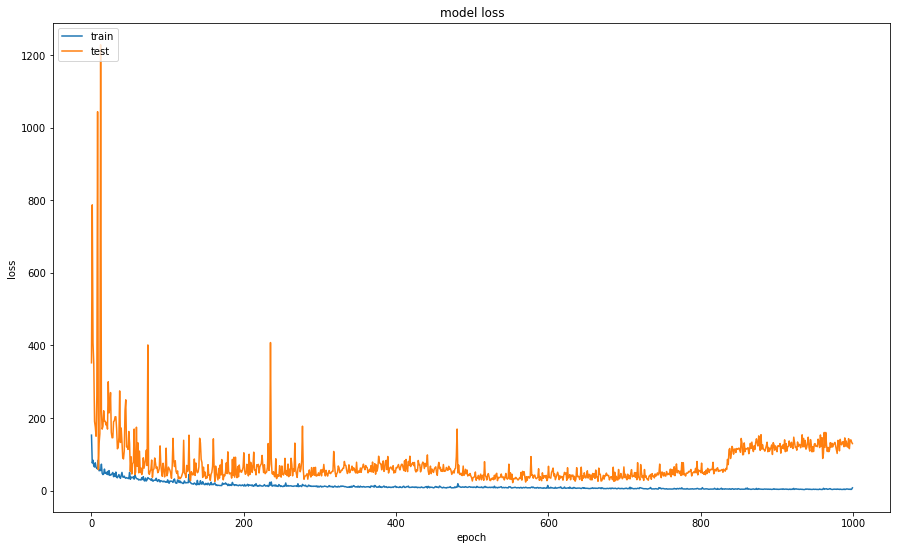

In [132]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### All Inputs Pre processed / Whitening

This section is basically a test to see how the results using the same prediction when all inputs are used in the model. Again it's broken into non preprocessed/whitened and preprocessed/whitened.

In [133]:
inputsallscale = pd.DataFrame(pre.scale(inputsall), columns=inputsall.columns)
pca = dec.PCA(n_components=13, whiten=True)
pca.fit(inputsallscale)
inputsallscale_white = pd.DataFrame(pca.transform(inputsallscale), columns=inputsallscale.columns)
history4 = modelall.fit(inputsallscale_white, outputs, validation_split=.2, epochs=1000, batch_size=30)

Train on 404 samples, validate on 102 samples
Epoch 1/1000
404/404 [==============================] - 0s 44us/step - loss: 309.7606 - accuracy: 0.0025 - mae: 14.2397 - val_loss: 39.1355 - val_accuracy: 0.0196 - val_mae: 4.8001
Epoch 2/1000
404/404 [==============================] - 0s 37us/step - loss: 70.2527 - accuracy: 0.0074 - mae: 6.0769 - val_loss: 31.5322 - val_accuracy: 0.0196 - val_mae: 4.3283
Epoch 3/1000
404/404 [==============================] - 0s 35us/step - loss: 31.0315 - accuracy: 0.0074 - mae: 4.1113 - val_loss: 27.9177 - val_accuracy: 0.0098 - val_mae: 4.2798
Epoch 4/1000
404/404 [==============================] - 0s 35us/step - loss: 24.2524 - accuracy: 0.0074 - mae: 3.6102 - val_loss: 25.3224 - val_accuracy: 0.0000e+00 - val_mae: 4.0011
Epoch 5/1000
404/404 [==============================] - 0s 35us/step - loss: 20.4393 - accuracy: 0.0198 - mae: 3.2779 - val_loss: 24.0102 - val_accuracy: 0.0000e+00 - val_mae: 3.8639
Epoch 6/1000
404/404 [===========================

Epoch 46/1000
404/404 [==============================] - 0s 30us/step - loss: 5.4077 - accuracy: 0.0297 - mae: 1.7274 - val_loss: 31.9290 - val_accuracy: 0.0000e+00 - val_mae: 4.2232
Epoch 47/1000
404/404 [==============================] - 0s 30us/step - loss: 5.3033 - accuracy: 0.0297 - mae: 1.7203 - val_loss: 31.7961 - val_accuracy: 0.0000e+00 - val_mae: 4.2082
Epoch 48/1000
404/404 [==============================] - 0s 32us/step - loss: 5.2272 - accuracy: 0.0272 - mae: 1.6766 - val_loss: 32.2977 - val_accuracy: 0.0000e+00 - val_mae: 4.2286
Epoch 49/1000
404/404 [==============================] - 0s 30us/step - loss: 5.2005 - accuracy: 0.0322 - mae: 1.6673 - val_loss: 32.7003 - val_accuracy: 0.0000e+00 - val_mae: 4.2494
Epoch 50/1000
404/404 [==============================] - 0s 30us/step - loss: 5.1484 - accuracy: 0.0297 - mae: 1.6820 - val_loss: 33.2372 - val_accuracy: 0.0000e+00 - val_mae: 4.2874
Epoch 51/1000
404/404 [==============================] - 0s 32us/step - loss: 5.0945 

Epoch 91/1000
404/404 [==============================] - 0s 37us/step - loss: 3.6703 - accuracy: 0.0297 - mae: 1.4203 - val_loss: 44.3714 - val_accuracy: 0.0098 - val_mae: 4.7750
Epoch 92/1000
404/404 [==============================] - 0s 39us/step - loss: 3.6073 - accuracy: 0.0223 - mae: 1.4135 - val_loss: 43.5917 - val_accuracy: 0.0098 - val_mae: 4.7605
Epoch 93/1000
404/404 [==============================] - 0s 39us/step - loss: 3.5878 - accuracy: 0.0297 - mae: 1.3905 - val_loss: 46.1363 - val_accuracy: 0.0098 - val_mae: 4.8354
Epoch 94/1000
404/404 [==============================] - 0s 37us/step - loss: 3.5986 - accuracy: 0.0272 - mae: 1.4098 - val_loss: 46.6332 - val_accuracy: 0.0098 - val_mae: 4.8806
Epoch 95/1000
404/404 [==============================] - 0s 32us/step - loss: 3.5241 - accuracy: 0.0272 - mae: 1.3894 - val_loss: 46.1879 - val_accuracy: 0.0098 - val_mae: 4.8633
Epoch 96/1000
404/404 [==============================] - 0s 32us/step - loss: 3.5178 - accuracy: 0.0347 -

Epoch 136/1000
404/404 [==============================] - 0s 32us/step - loss: 2.7216 - accuracy: 0.0421 - mae: 1.2116 - val_loss: 59.5094 - val_accuracy: 0.0000e+00 - val_mae: 5.4245
Epoch 137/1000
404/404 [==============================] - 0s 37us/step - loss: 2.7522 - accuracy: 0.0396 - mae: 1.2189 - val_loss: 57.6043 - val_accuracy: 0.0000e+00 - val_mae: 5.3559
Epoch 138/1000
404/404 [==============================] - 0s 32us/step - loss: 2.6824 - accuracy: 0.0371 - mae: 1.1988 - val_loss: 58.6083 - val_accuracy: 0.0000e+00 - val_mae: 5.3844
Epoch 139/1000
404/404 [==============================] - 0s 32us/step - loss: 2.6746 - accuracy: 0.0347 - mae: 1.2163 - val_loss: 56.0101 - val_accuracy: 0.0000e+00 - val_mae: 5.2820
Epoch 140/1000
404/404 [==============================] - 0s 39us/step - loss: 2.7335 - accuracy: 0.0347 - mae: 1.2209 - val_loss: 58.7428 - val_accuracy: 0.0000e+00 - val_mae: 5.3939
Epoch 141/1000
404/404 [==============================] - 0s 37us/step - loss: 2

404/404 [==============================] - 0s 39us/step - loss: 2.1637 - accuracy: 0.0347 - mae: 1.0784 - val_loss: 70.3665 - val_accuracy: 0.0000e+00 - val_mae: 5.8865
Epoch 181/1000
404/404 [==============================] - 0s 39us/step - loss: 2.1628 - accuracy: 0.0421 - mae: 1.0765 - val_loss: 71.5944 - val_accuracy: 0.0000e+00 - val_mae: 5.9339
Epoch 182/1000
404/404 [==============================] - 0s 35us/step - loss: 2.1717 - accuracy: 0.0371 - mae: 1.0827 - val_loss: 72.1158 - val_accuracy: 0.0000e+00 - val_mae: 5.9461
Epoch 183/1000
404/404 [==============================] - 0s 37us/step - loss: 2.1532 - accuracy: 0.0371 - mae: 1.0866 - val_loss: 74.6335 - val_accuracy: 0.0000e+00 - val_mae: 6.0459
Epoch 184/1000
404/404 [==============================] - 0s 35us/step - loss: 2.1425 - accuracy: 0.0421 - mae: 1.0720 - val_loss: 72.1500 - val_accuracy: 0.0000e+00 - val_mae: 5.9598
Epoch 185/1000
404/404 [==============================] - 0s 30us/step - loss: 2.1058 - accurac

404/404 [==============================] - 0s 32us/step - loss: 1.7867 - accuracy: 0.0520 - mae: 0.9792 - val_loss: 83.3953 - val_accuracy: 0.0098 - val_mae: 6.4073
Epoch 226/1000
404/404 [==============================] - 0s 35us/step - loss: 1.7243 - accuracy: 0.0545 - mae: 0.9595 - val_loss: 84.3782 - val_accuracy: 0.0098 - val_mae: 6.4576
Epoch 227/1000
404/404 [==============================] - 0s 37us/step - loss: 1.7468 - accuracy: 0.0495 - mae: 0.9742 - val_loss: 82.6828 - val_accuracy: 0.0098 - val_mae: 6.3851
Epoch 228/1000
404/404 [==============================] - 0s 35us/step - loss: 1.7316 - accuracy: 0.0545 - mae: 0.9621 - val_loss: 86.3698 - val_accuracy: 0.0098 - val_mae: 6.5294
Epoch 229/1000
404/404 [==============================] - 0s 35us/step - loss: 1.7480 - accuracy: 0.0545 - mae: 0.9566 - val_loss: 85.1268 - val_accuracy: 0.0098 - val_mae: 6.4865
Epoch 230/1000
404/404 [==============================] - 0s 35us/step - loss: 1.7577 - accuracy: 0.0495 - mae: 0.9

404/404 [==============================] - 0s 32us/step - loss: 1.4286 - accuracy: 0.0644 - mae: 0.8588 - val_loss: 92.7700 - val_accuracy: 0.0098 - val_mae: 6.7376
Epoch 271/1000
404/404 [==============================] - 0s 32us/step - loss: 1.4207 - accuracy: 0.0619 - mae: 0.8612 - val_loss: 94.6724 - val_accuracy: 0.0098 - val_mae: 6.8221
Epoch 272/1000
404/404 [==============================] - 0s 32us/step - loss: 1.4797 - accuracy: 0.0569 - mae: 0.9007 - val_loss: 91.5869 - val_accuracy: 0.0098 - val_mae: 6.6930
Epoch 273/1000
404/404 [==============================] - 0s 27us/step - loss: 1.4569 - accuracy: 0.0594 - mae: 0.8690 - val_loss: 93.0295 - val_accuracy: 0.0098 - val_mae: 6.7489
Epoch 274/1000
404/404 [==============================] - 0s 30us/step - loss: 1.4347 - accuracy: 0.0619 - mae: 0.8688 - val_loss: 91.0916 - val_accuracy: 0.0098 - val_mae: 6.6842
Epoch 275/1000
404/404 [==============================] - 0s 30us/step - loss: 1.3899 - accuracy: 0.0644 - mae: 0.8

404/404 [==============================] - 0s 37us/step - loss: 1.1962 - accuracy: 0.0693 - mae: 0.7798 - val_loss: 101.5586 - val_accuracy: 0.0098 - val_mae: 7.0444
Epoch 316/1000
404/404 [==============================] - 0s 35us/step - loss: 1.1924 - accuracy: 0.0668 - mae: 0.7937 - val_loss: 102.0592 - val_accuracy: 0.0196 - val_mae: 7.0331
Epoch 317/1000
404/404 [==============================] - 0s 32us/step - loss: 1.1918 - accuracy: 0.0842 - mae: 0.7743 - val_loss: 101.1740 - val_accuracy: 0.0098 - val_mae: 7.0003
Epoch 318/1000
404/404 [==============================] - 0s 35us/step - loss: 1.1134 - accuracy: 0.0743 - mae: 0.7525 - val_loss: 97.1338 - val_accuracy: 0.0196 - val_mae: 6.8557
Epoch 319/1000
404/404 [==============================] - 0s 32us/step - loss: 1.2021 - accuracy: 0.0767 - mae: 0.7762 - val_loss: 102.8544 - val_accuracy: 0.0098 - val_mae: 7.0590
Epoch 320/1000
404/404 [==============================] - 0s 32us/step - loss: 1.1548 - accuracy: 0.0718 - mae:

404/404 [==============================] - 0s 30us/step - loss: 0.9384 - accuracy: 0.0866 - mae: 0.6845 - val_loss: 109.6662 - val_accuracy: 0.0098 - val_mae: 7.2650
Epoch 361/1000
404/404 [==============================] - 0s 30us/step - loss: 0.9206 - accuracy: 0.0817 - mae: 0.6851 - val_loss: 110.5713 - val_accuracy: 0.0196 - val_mae: 7.2943
Epoch 362/1000
404/404 [==============================] - 0s 30us/step - loss: 0.9776 - accuracy: 0.0817 - mae: 0.6953 - val_loss: 110.5639 - val_accuracy: 0.0098 - val_mae: 7.2990
Epoch 363/1000
404/404 [==============================] - 0s 32us/step - loss: 0.9415 - accuracy: 0.0941 - mae: 0.6838 - val_loss: 110.2279 - val_accuracy: 0.0098 - val_mae: 7.2918
Epoch 364/1000
404/404 [==============================] - 0s 30us/step - loss: 0.9280 - accuracy: 0.0916 - mae: 0.6942 - val_loss: 111.2539 - val_accuracy: 0.0196 - val_mae: 7.3083
Epoch 365/1000
404/404 [==============================] - 0s 32us/step - loss: 0.8878 - accuracy: 0.0916 - mae

404/404 [==============================] - 0s 44us/step - loss: 0.7381 - accuracy: 0.0866 - mae: 0.6183 - val_loss: 124.4910 - val_accuracy: 0.0098 - val_mae: 7.7313
Epoch 406/1000
404/404 [==============================] - 0s 52us/step - loss: 0.7130 - accuracy: 0.0891 - mae: 0.6003 - val_loss: 122.9060 - val_accuracy: 0.0098 - val_mae: 7.6485
Epoch 407/1000
404/404 [==============================] - 0s 39us/step - loss: 0.6910 - accuracy: 0.0941 - mae: 0.5848 - val_loss: 123.7281 - val_accuracy: 0.0098 - val_mae: 7.6790
Epoch 408/1000
404/404 [==============================] - 0s 37us/step - loss: 0.7162 - accuracy: 0.0965 - mae: 0.5916 - val_loss: 121.1788 - val_accuracy: 0.0098 - val_mae: 7.6087
Epoch 409/1000
404/404 [==============================] - 0s 37us/step - loss: 0.7294 - accuracy: 0.0891 - mae: 0.6117 - val_loss: 123.9398 - val_accuracy: 0.0098 - val_mae: 7.6973
Epoch 410/1000
404/404 [==============================] - 0s 39us/step - loss: 0.7212 - accuracy: 0.0891 - mae

404/404 [==============================] - 0s 35us/step - loss: 0.6108 - accuracy: 0.0817 - mae: 0.5575 - val_loss: 134.1918 - val_accuracy: 0.0098 - val_mae: 8.0467
Epoch 451/1000
404/404 [==============================] - 0s 32us/step - loss: 0.5545 - accuracy: 0.0965 - mae: 0.5142 - val_loss: 134.3820 - val_accuracy: 0.0098 - val_mae: 8.0512
Epoch 452/1000
404/404 [==============================] - 0s 30us/step - loss: 0.5826 - accuracy: 0.1015 - mae: 0.5358 - val_loss: 138.6621 - val_accuracy: 0.0098 - val_mae: 8.2082
Epoch 453/1000
404/404 [==============================] - 0s 30us/step - loss: 0.6047 - accuracy: 0.0990 - mae: 0.5400 - val_loss: 130.2099 - val_accuracy: 0.0098 - val_mae: 7.9273
Epoch 454/1000
404/404 [==============================] - 0s 30us/step - loss: 0.5748 - accuracy: 0.0941 - mae: 0.5486 - val_loss: 134.8167 - val_accuracy: 0.0098 - val_mae: 8.0591
Epoch 455/1000
404/404 [==============================] - 0s 32us/step - loss: 0.5823 - accuracy: 0.1114 - mae

404/404 [==============================] - 0s 30us/step - loss: 0.4563 - accuracy: 0.1089 - mae: 0.4688 - val_loss: 147.2902 - val_accuracy: 0.0098 - val_mae: 8.5311
Epoch 496/1000
404/404 [==============================] - 0s 32us/step - loss: 0.4649 - accuracy: 0.0990 - mae: 0.4763 - val_loss: 144.5622 - val_accuracy: 0.0098 - val_mae: 8.4522
Epoch 497/1000
404/404 [==============================] - 0s 30us/step - loss: 0.4592 - accuracy: 0.1064 - mae: 0.4719 - val_loss: 142.8208 - val_accuracy: 0.0098 - val_mae: 8.3683
Epoch 498/1000
404/404 [==============================] - 0s 30us/step - loss: 0.4506 - accuracy: 0.1015 - mae: 0.4676 - val_loss: 151.0601 - val_accuracy: 0.0098 - val_mae: 8.6732
Epoch 499/1000
404/404 [==============================] - 0s 32us/step - loss: 0.4393 - accuracy: 0.1114 - mae: 0.4708 - val_loss: 150.4859 - val_accuracy: 0.0098 - val_mae: 8.6382
Epoch 500/1000
404/404 [==============================] - 0s 35us/step - loss: 0.4374 - accuracy: 0.1114 - mae

404/404 [==============================] - 0s 35us/step - loss: 0.3826 - accuracy: 0.1163 - mae: 0.4278 - val_loss: 164.6003 - val_accuracy: 0.0098 - val_mae: 9.0927
Epoch 541/1000
404/404 [==============================] - 0s 32us/step - loss: 0.4071 - accuracy: 0.0916 - mae: 0.4506 - val_loss: 160.4476 - val_accuracy: 0.0098 - val_mae: 8.9833
Epoch 542/1000
404/404 [==============================] - 0s 32us/step - loss: 0.3823 - accuracy: 0.0916 - mae: 0.4310 - val_loss: 160.1694 - val_accuracy: 0.0098 - val_mae: 8.9704
Epoch 543/1000
404/404 [==============================] - 0s 32us/step - loss: 0.3695 - accuracy: 0.1163 - mae: 0.4182 - val_loss: 162.6247 - val_accuracy: 0.0098 - val_mae: 9.0242
Epoch 544/1000
404/404 [==============================] - 0s 37us/step - loss: 0.3792 - accuracy: 0.1114 - mae: 0.4234 - val_loss: 156.6704 - val_accuracy: 0.0098 - val_mae: 8.8413
Epoch 545/1000
404/404 [==============================] - 0s 37us/step - loss: 0.3676 - accuracy: 0.1188 - mae

404/404 [==============================] - 0s 35us/step - loss: 0.3060 - accuracy: 0.1139 - mae: 0.3843 - val_loss: 173.5818 - val_accuracy: 0.0098 - val_mae: 9.3772
Epoch 586/1000
404/404 [==============================] - 0s 30us/step - loss: 0.3374 - accuracy: 0.1163 - mae: 0.3878 - val_loss: 172.5030 - val_accuracy: 0.0098 - val_mae: 9.3808
Epoch 587/1000
404/404 [==============================] - 0s 32us/step - loss: 0.3288 - accuracy: 0.1114 - mae: 0.4023 - val_loss: 170.6217 - val_accuracy: 0.0098 - val_mae: 9.3032
Epoch 588/1000
404/404 [==============================] - 0s 32us/step - loss: 0.3064 - accuracy: 0.1089 - mae: 0.3868 - val_loss: 171.7694 - val_accuracy: 0.0098 - val_mae: 9.3116
Epoch 589/1000
404/404 [==============================] - 0s 35us/step - loss: 0.2875 - accuracy: 0.1238 - mae: 0.3746 - val_loss: 174.4457 - val_accuracy: 0.0196 - val_mae: 9.3909
Epoch 590/1000
404/404 [==============================] - 0s 32us/step - loss: 0.2826 - accuracy: 0.1139 - mae

404/404 [==============================] - 0s 35us/step - loss: 0.2579 - accuracy: 0.1262 - mae: 0.3480 - val_loss: 182.0172 - val_accuracy: 0.0196 - val_mae: 9.6207
Epoch 631/1000
404/404 [==============================] - 0s 35us/step - loss: 0.2520 - accuracy: 0.1089 - mae: 0.3462 - val_loss: 181.4523 - val_accuracy: 0.0196 - val_mae: 9.5923
Epoch 632/1000
404/404 [==============================] - 0s 32us/step - loss: 0.2640 - accuracy: 0.1262 - mae: 0.3573 - val_loss: 174.1370 - val_accuracy: 0.0098 - val_mae: 9.3862
Epoch 633/1000
404/404 [==============================] - 0s 30us/step - loss: 0.2594 - accuracy: 0.1238 - mae: 0.3410 - val_loss: 180.5768 - val_accuracy: 0.0196 - val_mae: 9.5666
Epoch 634/1000
404/404 [==============================] - 0s 32us/step - loss: 0.2355 - accuracy: 0.1238 - mae: 0.3250 - val_loss: 181.0373 - val_accuracy: 0.0098 - val_mae: 9.5598
Epoch 635/1000
404/404 [==============================] - 0s 35us/step - loss: 0.2388 - accuracy: 0.1262 - mae

404/404 [==============================] - 0s 30us/step - loss: 0.2000 - accuracy: 0.1312 - mae: 0.3090 - val_loss: 182.3491 - val_accuracy: 0.0098 - val_mae: 9.5973
Epoch 676/1000
404/404 [==============================] - 0s 32us/step - loss: 0.2392 - accuracy: 0.1114 - mae: 0.3574 - val_loss: 199.0835 - val_accuracy: 0.0098 - val_mae: 10.1361
Epoch 677/1000
404/404 [==============================] - 0s 30us/step - loss: 0.2122 - accuracy: 0.1238 - mae: 0.3356 - val_loss: 190.8303 - val_accuracy: 0.0294 - val_mae: 9.8139
Epoch 678/1000
404/404 [==============================] - 0s 32us/step - loss: 0.2068 - accuracy: 0.1213 - mae: 0.3293 - val_loss: 187.7343 - val_accuracy: 0.0098 - val_mae: 9.7852
Epoch 679/1000
404/404 [==============================] - 0s 32us/step - loss: 0.2147 - accuracy: 0.1238 - mae: 0.3175 - val_loss: 197.0614 - val_accuracy: 0.0294 - val_mae: 10.0325
Epoch 680/1000
404/404 [==============================] - 0s 32us/step - loss: 0.2041 - accuracy: 0.1262 - m

404/404 [==============================] - 0s 35us/step - loss: 0.1732 - accuracy: 0.1361 - mae: 0.2905 - val_loss: 195.0566 - val_accuracy: 0.0098 - val_mae: 9.9445
Epoch 721/1000
404/404 [==============================] - 0s 39us/step - loss: 0.2424 - accuracy: 0.1213 - mae: 0.3585 - val_loss: 198.7528 - val_accuracy: 0.0098 - val_mae: 10.0610
Epoch 722/1000
404/404 [==============================] - 0s 37us/step - loss: 0.1873 - accuracy: 0.1287 - mae: 0.2985 - val_loss: 197.8362 - val_accuracy: 0.0098 - val_mae: 9.9992
Epoch 723/1000
404/404 [==============================] - 0s 35us/step - loss: 0.1711 - accuracy: 0.1213 - mae: 0.2908 - val_loss: 197.9758 - val_accuracy: 0.0098 - val_mae: 10.0249
Epoch 724/1000
404/404 [==============================] - 0s 35us/step - loss: 0.1548 - accuracy: 0.1287 - mae: 0.2657 - val_loss: 200.8591 - val_accuracy: 0.0098 - val_mae: 10.0862
Epoch 725/1000
404/404 [==============================] - 0s 30us/step - loss: 0.1712 - accuracy: 0.1213 - 

404/404 [==============================] - 0s 30us/step - loss: 0.1589 - accuracy: 0.1337 - mae: 0.2745 - val_loss: 204.9780 - val_accuracy: 0.0098 - val_mae: 10.1833
Epoch 766/1000
404/404 [==============================] - 0s 30us/step - loss: 0.1690 - accuracy: 0.1188 - mae: 0.2830 - val_loss: 206.9674 - val_accuracy: 0.0098 - val_mae: 10.2700
Epoch 767/1000
404/404 [==============================] - 0s 30us/step - loss: 0.1448 - accuracy: 0.1436 - mae: 0.2742 - val_loss: 202.7500 - val_accuracy: 0.0098 - val_mae: 10.1795
Epoch 768/1000
404/404 [==============================] - 0s 30us/step - loss: 0.1585 - accuracy: 0.1262 - mae: 0.2943 - val_loss: 201.4095 - val_accuracy: 0.0098 - val_mae: 10.0957
Epoch 769/1000
404/404 [==============================] - 0s 30us/step - loss: 0.1763 - accuracy: 0.1312 - mae: 0.2796 - val_loss: 204.8649 - val_accuracy: 0.0098 - val_mae: 10.2345
Epoch 770/1000
404/404 [==============================] - 0s 32us/step - loss: 0.1474 - accuracy: 0.1312 

404/404 [==============================] - 0s 30us/step - loss: 0.1273 - accuracy: 0.1386 - mae: 0.2420 - val_loss: 204.6854 - val_accuracy: 0.0098 - val_mae: 10.2240
Epoch 811/1000
404/404 [==============================] - 0s 32us/step - loss: 0.1477 - accuracy: 0.1312 - mae: 0.2673 - val_loss: 209.9401 - val_accuracy: 0.0098 - val_mae: 10.3511
Epoch 812/1000
404/404 [==============================] - 0s 47us/step - loss: 0.1459 - accuracy: 0.1213 - mae: 0.2654 - val_loss: 209.2690 - val_accuracy: 0.0000e+00 - val_mae: 10.4119
Epoch 813/1000
404/404 [==============================] - 0s 49us/step - loss: 0.1488 - accuracy: 0.1213 - mae: 0.2627 - val_loss: 210.5419 - val_accuracy: 0.0098 - val_mae: 10.3495
Epoch 814/1000
404/404 [==============================] - 0s 40us/step - loss: 0.1417 - accuracy: 0.1312 - mae: 0.2598 - val_loss: 209.0215 - val_accuracy: 0.0098 - val_mae: 10.3743
Epoch 815/1000
404/404 [==============================] - 0s 37us/step - loss: 0.1341 - accuracy: 0.1

Epoch 855/1000
404/404 [==============================] - 0s 32us/step - loss: 0.1204 - accuracy: 0.1361 - mae: 0.2432 - val_loss: 212.3509 - val_accuracy: 0.0098 - val_mae: 10.4881
Epoch 856/1000
404/404 [==============================] - 0s 30us/step - loss: 0.0956 - accuracy: 0.1436 - mae: 0.2142 - val_loss: 215.5780 - val_accuracy: 0.0098 - val_mae: 10.5418
Epoch 857/1000
404/404 [==============================] - 0s 32us/step - loss: 0.1003 - accuracy: 0.1262 - mae: 0.2218 - val_loss: 209.5529 - val_accuracy: 0.0196 - val_mae: 10.3574
Epoch 858/1000
404/404 [==============================] - 0s 32us/step - loss: 0.1050 - accuracy: 0.1411 - mae: 0.2181 - val_loss: 214.7989 - val_accuracy: 0.0098 - val_mae: 10.5198
Epoch 859/1000
404/404 [==============================] - 0s 32us/step - loss: 0.1284 - accuracy: 0.1337 - mae: 0.2399 - val_loss: 209.4132 - val_accuracy: 0.0098 - val_mae: 10.3580
Epoch 860/1000
404/404 [==============================] - 0s 32us/step - loss: 0.1021 - ac

404/404 [==============================] - 0s 32us/step - loss: 0.0907 - accuracy: 0.1485 - mae: 0.2174 - val_loss: 211.9165 - val_accuracy: 0.0098 - val_mae: 10.4285
Epoch 900/1000
404/404 [==============================] - 0s 32us/step - loss: 0.1001 - accuracy: 0.1436 - mae: 0.2224 - val_loss: 214.2126 - val_accuracy: 0.0098 - val_mae: 10.5097
Epoch 901/1000
404/404 [==============================] - 0s 32us/step - loss: 0.1320 - accuracy: 0.1361 - mae: 0.2505 - val_loss: 211.5224 - val_accuracy: 0.0000e+00 - val_mae: 10.4629
Epoch 902/1000
404/404 [==============================] - 0s 32us/step - loss: 0.1362 - accuracy: 0.1213 - mae: 0.2668 - val_loss: 212.0880 - val_accuracy: 0.0098 - val_mae: 10.4468
Epoch 903/1000
404/404 [==============================] - 0s 32us/step - loss: 0.1118 - accuracy: 0.1262 - mae: 0.2339 - val_loss: 219.9406 - val_accuracy: 0.0098 - val_mae: 10.6767
Epoch 904/1000
404/404 [==============================] - 0s 39us/step - loss: 0.0979 - accuracy: 0.1

Epoch 944/1000
404/404 [==============================] - 0s 32us/step - loss: 0.0907 - accuracy: 0.1386 - mae: 0.2105 - val_loss: 210.9142 - val_accuracy: 0.0098 - val_mae: 10.4154
Epoch 945/1000
404/404 [==============================] - 0s 35us/step - loss: 0.0875 - accuracy: 0.1386 - mae: 0.1990 - val_loss: 215.9225 - val_accuracy: 0.0098 - val_mae: 10.5651
Epoch 946/1000
404/404 [==============================] - 0s 37us/step - loss: 0.0793 - accuracy: 0.1460 - mae: 0.1989 - val_loss: 212.6411 - val_accuracy: 0.0098 - val_mae: 10.4904
Epoch 947/1000
404/404 [==============================] - 0s 37us/step - loss: 0.0857 - accuracy: 0.1411 - mae: 0.1985 - val_loss: 218.1075 - val_accuracy: 0.0098 - val_mae: 10.6112
Epoch 948/1000
404/404 [==============================] - 0s 37us/step - loss: 0.0710 - accuracy: 0.1460 - mae: 0.1909 - val_loss: 214.3972 - val_accuracy: 0.0098 - val_mae: 10.5216
Epoch 949/1000
404/404 [==============================] - 0s 35us/step - loss: 0.0607 - ac

Epoch 989/1000
404/404 [==============================] - 0s 30us/step - loss: 0.1066 - accuracy: 0.1262 - mae: 0.2302 - val_loss: 213.8124 - val_accuracy: 0.0196 - val_mae: 10.4712
Epoch 990/1000
404/404 [==============================] - 0s 32us/step - loss: 0.1512 - accuracy: 0.1163 - mae: 0.2699 - val_loss: 215.6550 - val_accuracy: 0.0098 - val_mae: 10.5268
Epoch 991/1000
404/404 [==============================] - 0s 32us/step - loss: 0.1555 - accuracy: 0.1114 - mae: 0.2863 - val_loss: 223.3476 - val_accuracy: 0.0294 - val_mae: 10.7611
Epoch 992/1000
404/404 [==============================] - 0s 32us/step - loss: 0.1397 - accuracy: 0.1213 - mae: 0.2718 - val_loss: 217.7725 - val_accuracy: 0.0196 - val_mae: 10.6526
Epoch 993/1000
404/404 [==============================] - 0s 32us/step - loss: 0.1292 - accuracy: 0.1386 - mae: 0.2603 - val_loss: 218.3940 - val_accuracy: 0.0098 - val_mae: 10.6162
Epoch 994/1000
404/404 [==============================] - 0s 35us/step - loss: 0.1104 - ac

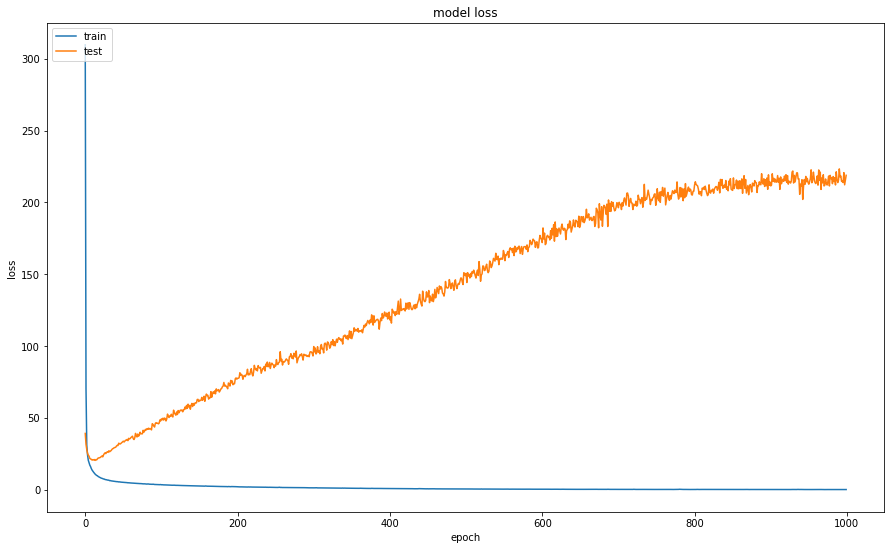

In [134]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

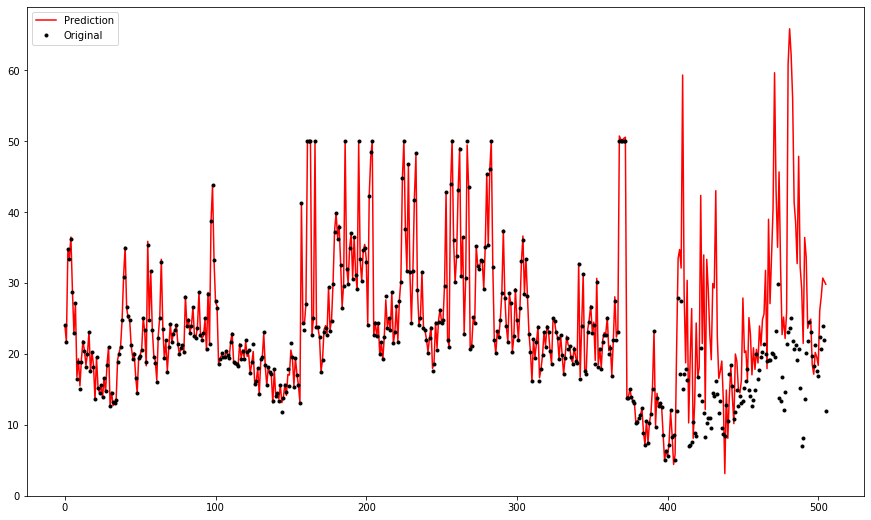

In [135]:
p4 = modelall.predict(inputsallscale_white)
plt.plot(p4, 'r-', label='Prediction')
plt.plot(outputs, 'k.', label='Original')
plt.legend()

## Prediction review

We can use the loss function to calculate how well the prediction fits the data it's trained on. This loss calculation is based on the difference between predicted and actual values. The larger the number, the further the predicted values are from the actual values[4]. 

In our first scenario, six inputs were selected. These were selected based on ttest results picking what I thought were the variables most likely to impact MEDV. 2nd scenario invloved the same 6 inputs but the data was preprocessed and whitened. 
The 3rd and 4th scenarios were basically the same except it included all 13 variables. The loss values (at the end of the run cycle) for these are as follows.

<table>
    <tr>
        <th>
            Scenario
        </th>
        <th>
            Loss Result
        </th>
    </tr>
    <tr>
        <td>
            6 Inputs - No Preprocessing/Whitening
        </td>
        <td>
            5.3
        </td>
    </tr>
    <tr>
        <td>
            6 Inputs - Preprocessing/Whitening
        </td>
        <td>
            2.6
        </td>
    </tr>
    <tr>
        <td>
            All Inputs - No Preprocessing/Whitening
        </td>
        <td>
            4.1
        </td>
    </tr>
    <tr>
        <td>
            All Inputs - Preprocessing/Whitening
        </td>
        <td>
            0.1
        </td>
</tr>
</table>


*Please note that the results in this table may be different when the Notebook is run again.

One of the most interesting aspects noticed here is the gain made in the prediction using all inputs when whitened. It may be useful to visualise two of the different prediction models overlayed.

The main element that continues to confuse me is why the results using all of the predictions would have such an improvement when whitened. Without preprocessing/whitening the initial 6 inputs perform better. This would be expected as the variable were selected based on what variables were thought to influence and correlate with MEDV. However went both input sets are whitened/preprocessed, the prediction with all of the inputs performed much better. It would be interesting to delve deeper into why this is. 

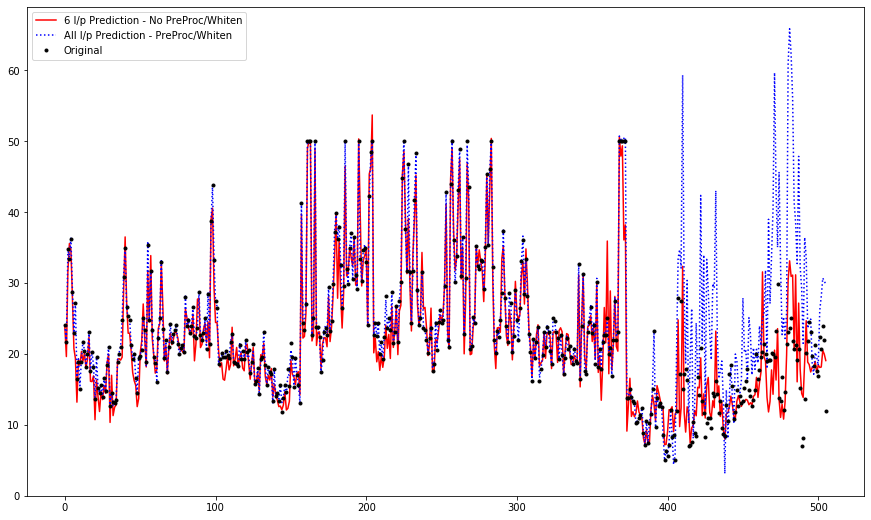

In [136]:
plt.plot(p, 'r-', label='6 I/p Prediction - No PreProc/Whiten')
plt.plot(p4, 'b:', label='All I/p Prediction - PreProc/Whiten')
plt.plot(outputs, 'k.', label='Original')
plt.legend()

What is interesting here is that the prediction with all of the inputs pre processed and whitened started off very accurate and toward the end seemed to increase in error. Overall it was more accurate compared to the initial 6 input trial where there was no whitening/pre processing but towards the end it varied a lot.

### Conclusion

The Boston dataset is useful to examine many area's of machine learning and statistics. Although it may be outdated at this stage it still relatable enough to allow the user to intrepret and understand the different variables and draw conclusions on it. 

Many aspects of machine learning using Keras seem to be guess work. Keep changing things until results required are seen however this is a facinating area and I look forward to delving deeper into the subject. 

## References

[1] - https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

[2] - https://scikit-learn.org/stable/modules/preprocessing.html

[3] - http://cs229.stanford.edu/proj2015/054_report.pdf

[4] - https://heartbeat.fritz.ai/how-to-create-a-custom-loss-function-in-keras-637bd312e9ab
